In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

# Importing Necessacry library.

In [460]:
#Loading and Reading the dataset
data=pd.read_csv(r"C:\Users\jagi5\OneDrive\Desktop\dataset_diabetes\dataset_diabetes\diabetic_data.csv")
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [461]:
data.shape

(101766, 50)

In [462]:
#No of rows are 101766
#No of columns are 50

In [463]:
data.dtypes # Checking all datatypes of the dataset.

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [464]:
#Replacing the "?" With "Nan"
data1 = data.replace("?",np.nan) #inplace=True)

In [465]:
data1['admission_type_id']=data1['admission_type_id'].astype('object')
data1['discharge_disposition_id']=data1['discharge_disposition_id'].astype('object')
data1['admission_source_id']=data1['admission_source_id'].astype('object')


In [466]:
data1.age = data1.age.replace({"[70-80)":75,
                         "[60-70)":65,
                         "[50-60)":55,
                         "[80-90)":85,
                         "[40-50)":45,
                         "[30-40)":35,
                         "[90-100)":95,
                         "[20-30)":25,
                         "[10-20)":15,
                         "[0-10)":5})

In [467]:
#Imputing age with median value

In [468]:
data1['age']=data1['age'].astype('int64') #converting age feature from categorical to numerical

In [469]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  int64 
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  object
 7   discharge_disposition_id  101766 non-null  object
 8   admission_source_id       101766 non-null  object
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [470]:
# Numerical Features
cols_num = ['encounter_id','patient_nbr','age','time_in_hospital','num_lab_procedures', 'num_procedures', 'num_medications','number_outpatient', 'number_emergency','number_inpatient','number_diagnoses']
cols_num

['encounter_id',
 'patient_nbr',
 'age',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses']

In [471]:
data1[cols_num].isnull().sum()

encounter_id          0
patient_nbr           0
age                   0
time_in_hospital      0
num_lab_procedures    0
num_procedures        0
num_medications       0
number_outpatient     0
number_emergency      0
number_inpatient      0
number_diagnoses      0
dtype: int64

In [472]:
#Categorical Features
cols_cat = ['race', 'gender', 
       'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed','payer_code','readmitted']
cols_cat

['race',
 'gender',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'payer_code',
 'readmitted']

In [473]:
len(cols_cat)

29

In [474]:
data1[cols_cat].isnull().sum()   #checking missing values

race                         2273
gender                          0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide                       0
tolbutamide                     0
pioglitazone                    0
rosiglitazone                   0
acarbose                        0
miglitol                        0
troglitazone                    0
tolazamide                      0
insulin                         0
glyburide-metformin             0
glipizide-metformin             0
glimepiride-pioglitazone        0
metformin-rosiglitazone         0
metformin-pioglitazone          0
change                          0
diabetesMed                     0
payer_code                  40256
readmitted                      0
dtype: int64

race, payer_code, and medical_specialty have missing data. Since these are categorical data, the best thing to do is to just add another categorical type for unknown using the fillna function.

In [475]:
data1['race'] = data1['race'].fillna('Unknown')
data1['payer_code'] = data1['payer_code'].fillna('Unknown')
data1['medical_specialty'] = data1['medical_specialty'].fillna('Unknown')



In [476]:
print('Number medical specialty:', data1.medical_specialty.nunique())
data1.groupby('medical_specialty').size().sort_values(ascending = False)

Number medical specialty: 73


medical_specialty
Unknown                             49949
InternalMedicine                    14635
Emergency/Trauma                     7565
Family/GeneralPractice               7440
Cardiology                           5352
                                    ...  
Surgery-PlasticwithinHeadandNeck        1
Dermatology                             1
Proctology                              1
Psychiatry-Addictive                    1
Speech                                  1
Length: 73, dtype: int64

We can see that most of them are unknown and that the count drops off pretty quickly. We don't want to add 73 new variables since some of them only have a few samples. As an alternative, we can create a new variable that only has 11 options (the top 10 specialities and then an other category). Obviously, there are other options for bucketing, but this is one of the easiest methods

In [477]:
top_10 = ['Unknown','InternalMedicine','Emergency/Trauma',\
          'Family/GeneralPractice', 'Cardiology','Surgery-General' ,\
          'Nephrology','Orthopedics',\
          'Orthopedics-Reconstructive','Radiologist']

# make a new column with duplicated data
data1['med_spec'] = data1['medical_specialty'].copy()

# replace all specialties not in top 10 with 'Other' category
data1.loc[~data1.med_spec.isin(top_10),'med_spec'] = 'Other'

In [478]:

data1.groupby('med_spec').size()


med_spec
Cardiology                     5352
Emergency/Trauma               7565
Family/GeneralPractice         7440
InternalMedicine              14635
Nephrology                     1613
Orthopedics                    1400
Orthopedics-Reconstructive     1233
Other                          8340
Radiologist                    1140
Surgery-General                3099
Unknown                       49949
dtype: int64

<AxesSubplot:xlabel='weight', ylabel='count'>

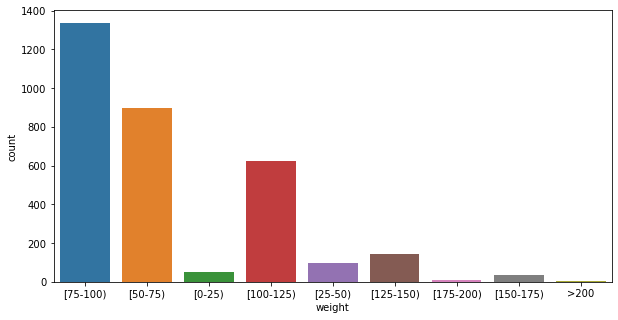

In [479]:
plt.figure(figsize=(10,5))
sns.countplot(data1['weight'])

In [480]:
data1['weight'].value_counts()

[75-100)     1336
[50-75)       897
[100-125)     625
[125-150)     145
[25-50)        97
[0-25)         48
[150-175)      35
[175-200)      11
>200            3
Name: weight, dtype: int64

In [481]:
data1['weight'].isnull().sum()   #feature weight has 98% missing values

98569

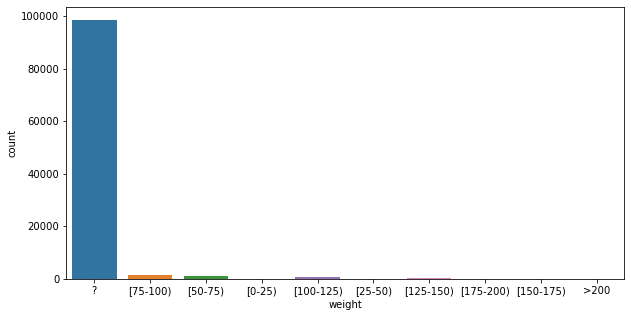

In [482]:
data1['weight']=data1['weight'].fillna('?')

plt.figure(figsize=(10,5))
sns.countplot(data1['weight'])
plt.show()

We observed that “weight” is missing in 98% of the records. So, we will to drop this feature from the dataset.

In [483]:
df=data1.drop('weight',axis=1) # weight Columns has been dropped.

In [484]:
df

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,med_spec
0,2278392,8222157,Caucasian,Female,5,6,25,1,1,Unknown,...,No,No,No,No,No,No,No,No,NO,Other
1,149190,55629189,Caucasian,Female,15,1,1,7,3,Unknown,...,Up,No,No,No,No,No,Ch,Yes,>30,Unknown
2,64410,86047875,AfricanAmerican,Female,25,1,1,7,2,Unknown,...,No,No,No,No,No,No,No,Yes,NO,Unknown
3,500364,82442376,Caucasian,Male,35,1,1,7,2,Unknown,...,Up,No,No,No,No,No,Ch,Yes,NO,Unknown
4,16680,42519267,Caucasian,Male,45,1,1,7,1,Unknown,...,Steady,No,No,No,No,No,Ch,Yes,NO,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,75,1,3,7,3,MC,...,Down,No,No,No,No,No,Ch,Yes,>30,Unknown
101762,443847782,74694222,AfricanAmerican,Female,85,1,4,5,5,MC,...,Steady,No,No,No,No,No,No,Yes,NO,Unknown
101763,443854148,41088789,Caucasian,Male,75,1,1,7,1,MC,...,Down,No,No,No,No,No,Ch,Yes,NO,Unknown
101764,443857166,31693671,Caucasian,Female,85,2,3,7,10,MC,...,Up,No,No,No,No,No,Ch,Yes,NO,Surgery-General


# Univariate analysis

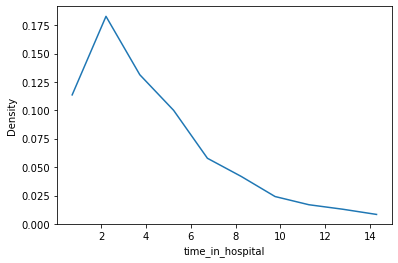

In [485]:
sns.kdeplot(df['time_in_hospital'],gridsize=10,cut=1)   #Majority of the patient spends 2–5 days in hospital
plt.show()


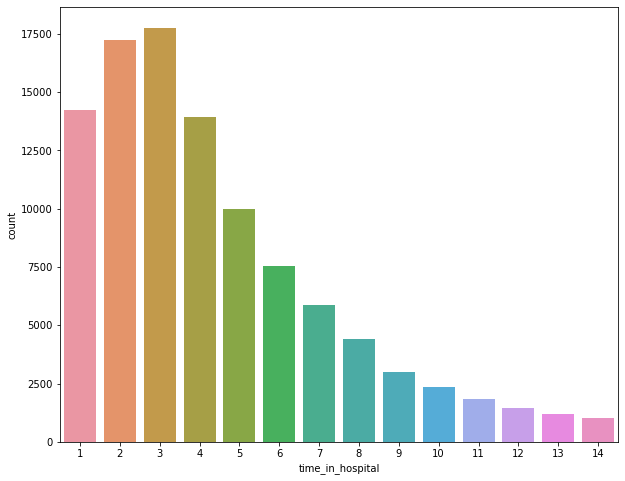

In [486]:
plt.figure(figsize=(10,8))
sns.countplot(df['time_in_hospital'])
plt.show()

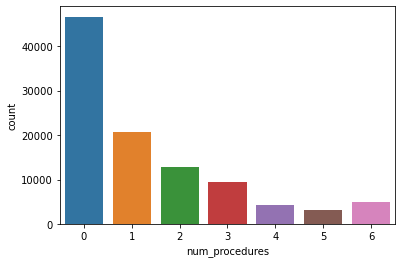

In [487]:
sns.countplot(df['num_procedures'])   # Majority of the patients being operated with no procedure or 1 at max.
plt.show()


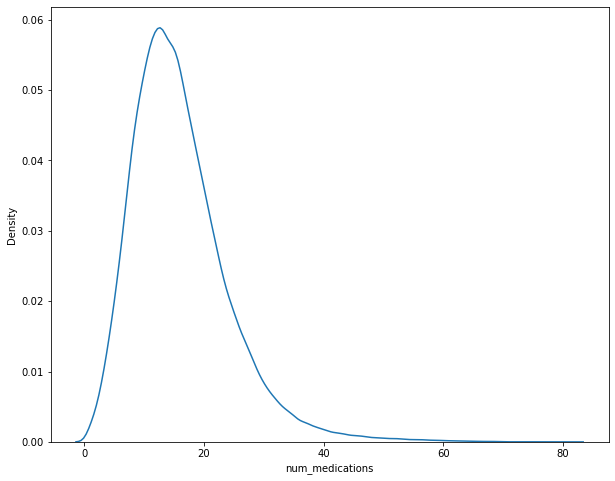

In [488]:
plt.figure(figsize=(10,8))          # Majority of patients are having 10–25 medications being given.
sns.kdeplot(df['num_medications'])   
plt.show()


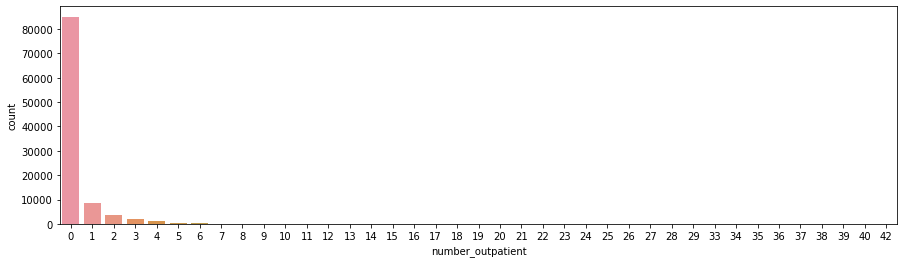

In [489]:
plt.figure(figsize=(15,4))                  #Majority of patients are NOT consuming outpatient facilities
sns.countplot(df['number_outpatient'])   
plt.show()


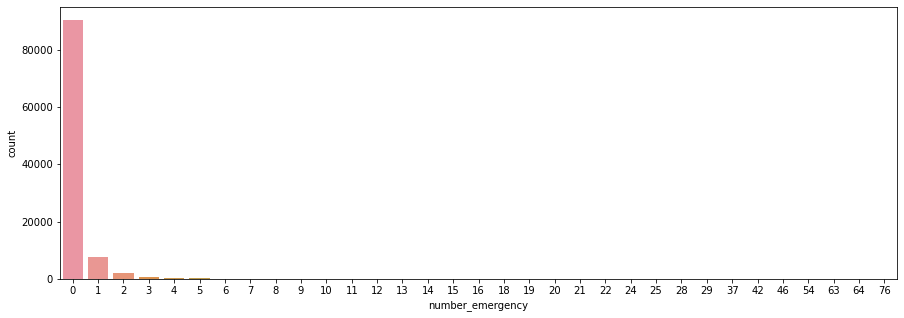

In [490]:
plt.figure(figsize=(15,5)) 
sns.countplot(df['number_emergency'])   #Some portions of patients are consuming emergency facilities
plt.show()


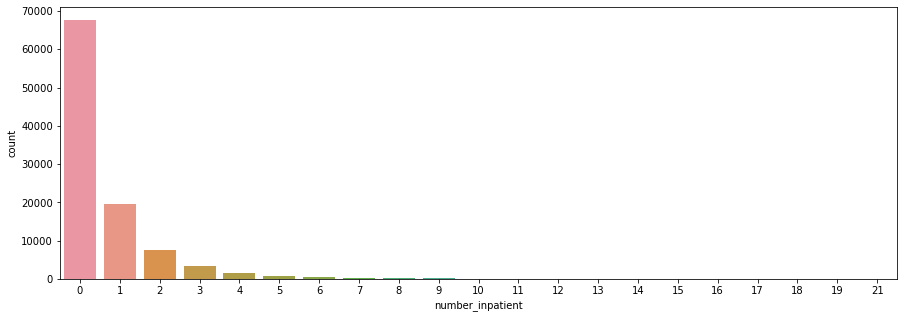

In [491]:
plt.figure(figsize=(15,5)) 
sns.countplot(df['number_inpatient']) #Some portions of patients are consuming outpatient facilities  
plt.show()


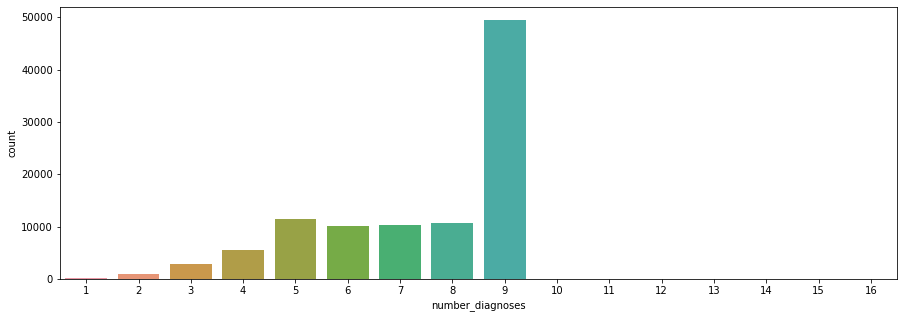

In [492]:
plt.figure(figsize=(15,5))
sns.countplot(df['number_diagnoses'])  # Average of 5-9 diagnoses was entered for the majority of the patients.
plt.show()


# Categorical Analysis

In [493]:
#In gender column we had missing value named Unknown/Invalid so we replaced it with mode.
df=df.replace('Unknown/Invalid','Female')

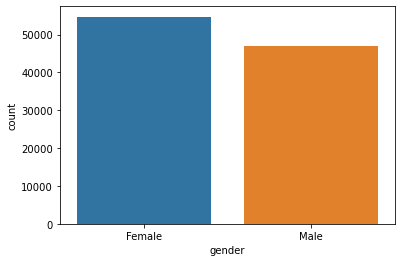

In [494]:
sns.countplot(df['gender'])
plt.show()

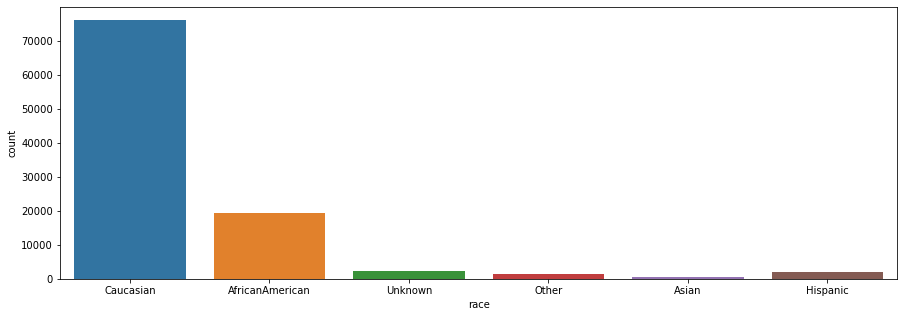

In [495]:
plt.figure(figsize=(15,5))
sns.countplot(df['race'])
plt.show()
# We have replaced missing value category as "Unknown"

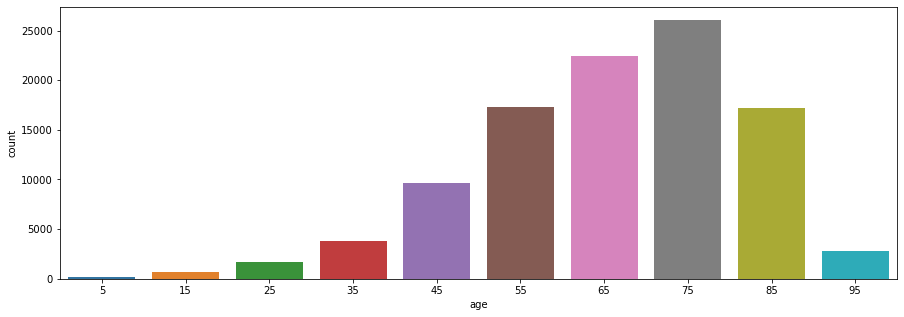

In [496]:
plt.figure(figsize=(15,5))
sns.countplot(df['age'])
plt.show()

#Majority of the cases fall in the range of above 60+ years

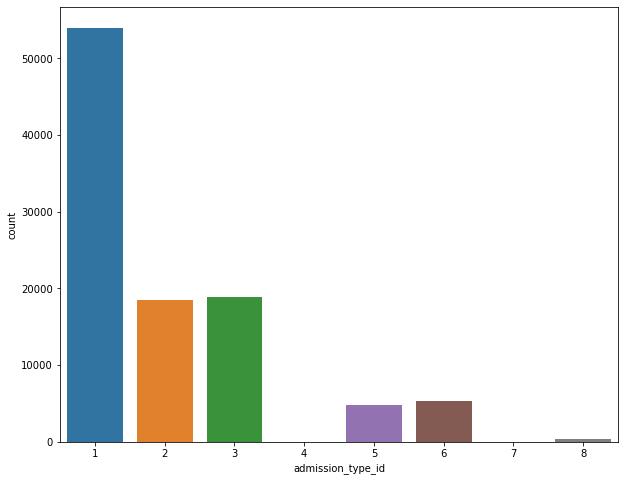

In [497]:
plt.figure(figsize=(10,8))
sns.countplot(df['admission_type_id'])  #Emergency, urgent constitute the major proportion of the followed by elective admissions
plt.show()



1	Emergency
2	Urgent
3	Elective
4	Newborn
5	Not Available
6	NULL
7	Trauma Center
8	Not Mapped

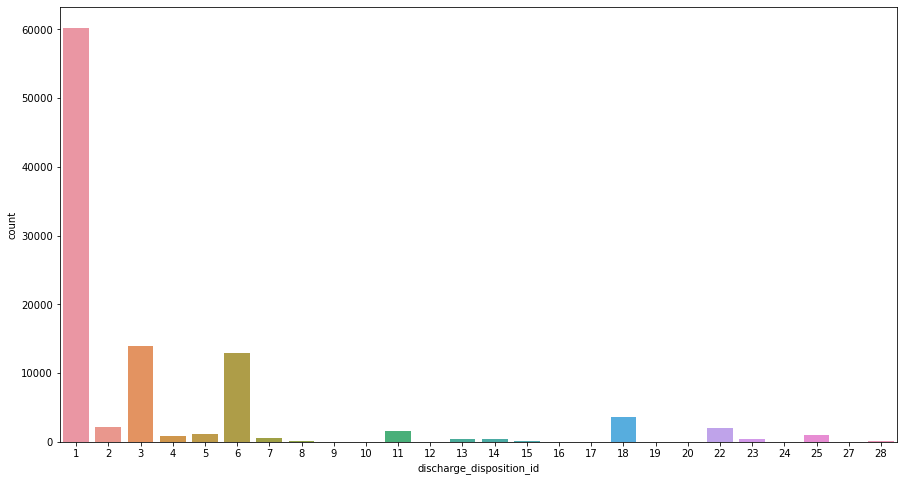

In [498]:
plt.figure(figsize=(15,8))
sns.countplot(df['discharge_disposition_id']) 
plt.show()

#Seems too many categories where discharge to home constitute the major portion followed by discharge to a skilled nursing or other facilities.


discharge_disposition_id	description
1	Discharged to home
2	Discharged/transferred to another short term hospital
3	Discharged/transferred to SNF
4	Discharged/transferred to ICF
5	Discharged/transferred to another type of inpatient care institution
6	Discharged/transferred to home with home health service
7	Left AMA
8	Discharged/transferred to home under care of Home IV provider
9	Admitted as an inpatient to this hospital
10	Neonate discharged to another hospital for neonatal aftercare
11	Expired
12	Still patient or expected to return for outpatient services
13	Hospice / home
14	Hospice / medical facility
15	Discharged/transferred within this institution to Medicare approved swing bed
16	Discharged/transferred/referred another institution for outpatient services
17	Discharged/transferred/referred to this institution for outpatient services
18	NULL
19	Expired at home. Medicaid only, hospice.
20	Expired in a medical facility. Medicaid only, hospice.
21	Expired, place unknown. Medicaid only, hospice.
22	Discharged/transferred to another rehab fac including rehab units of a hospital .
23	Discharged/transferred to a long term care hospital.
24	Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.
25	Not Mapped
26	Unknown/Invalid
30	Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere
27	Discharged/transferred to a federal health care facility.
28	Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital
29	Discharged/transferred to a Critical Access Hospital (CAH).


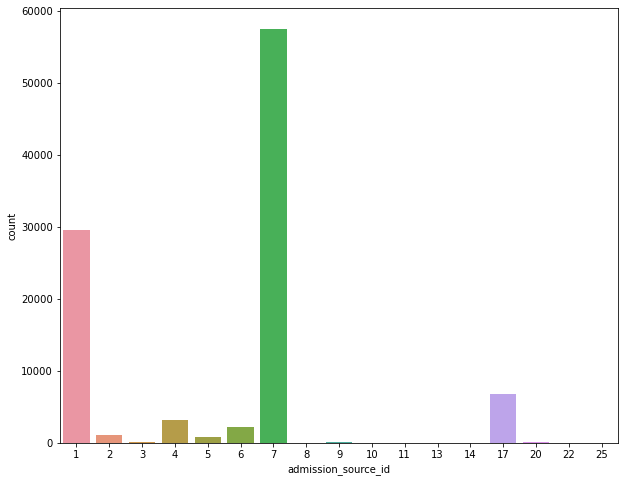

In [499]:
plt.figure(figsize=(10,8))
df['admission_source_id']=df['admission_source_id'].sort_values(ascending=False)
sns.countplot(df['admission_source_id'])
plt.show()


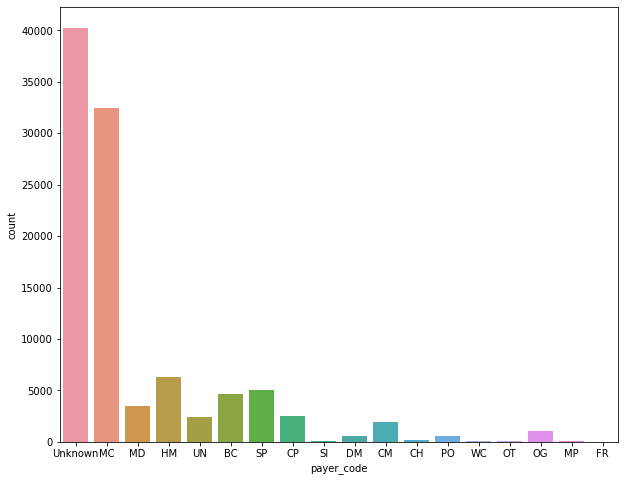

In [500]:
plt.figure(figsize=(10,8))
sns.countplot(df['payer_code'])
plt.show()

# We have replace NAN value as "Unknown"

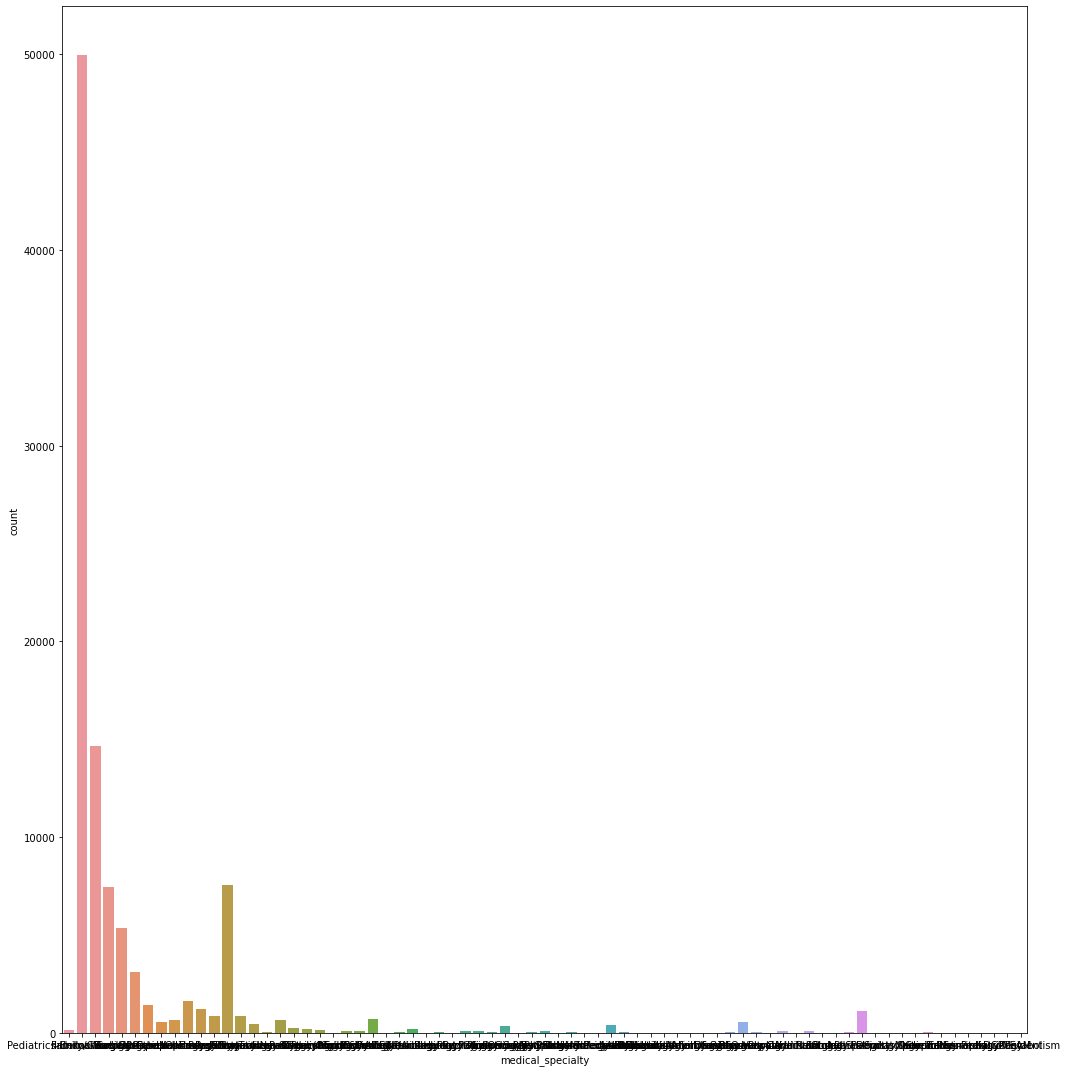

In [501]:
plt.figure(figsize=(15,15))
sns.countplot(df['medical_specialty'])
plt.tight_layout()
plt.show()

# We have replace NAN value as "Unknown"

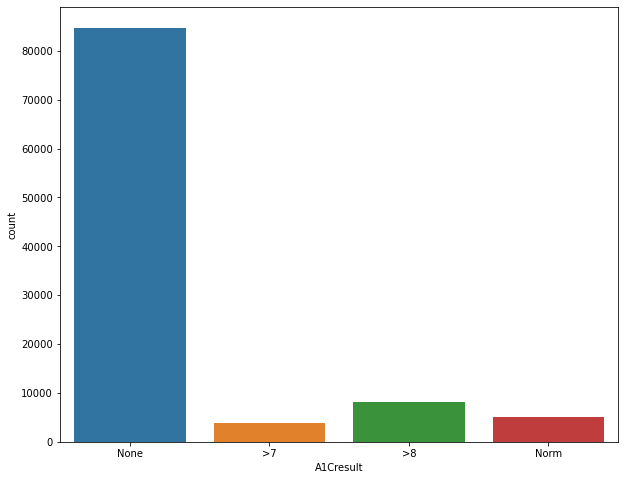

In [502]:
plt.figure(figsize=(10,8))
sns.countplot(df['A1Cresult']) # This feature is one of the strong indicators of blood sugar level in the body, anyone having results greater than 6.5 is considered as diabetic. 
#However, surprisingly majority of this data is reflected as “None”
plt.show()


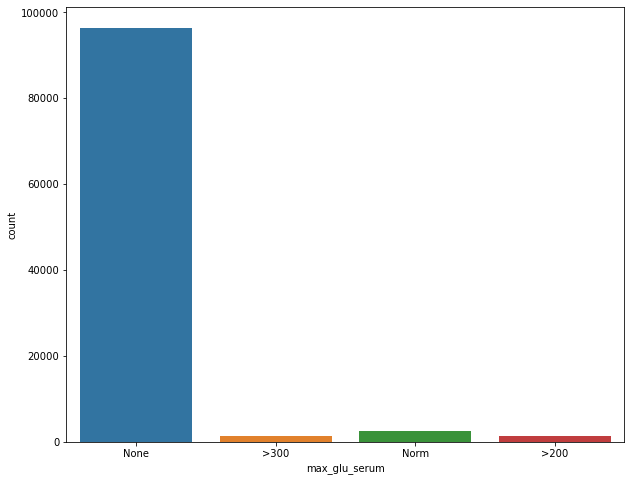

In [503]:
plt.figure(figsize=(10,8))
sns.countplot(df['max_glu_serum'])
plt.show()

#This is another indicator of glucose and insulin level in the blood. However, majority of the data is “None”.
#Anything greater than 200 is good indicator of diabetic patient


24 features for medications: Indicates whether the dosage for the medicines was changed in any manner during the encounter.
metformin, repaginate, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, , glyburide-metformin, glipizide-metformin, glimepiride-pioglitazone, metformin-rosiglitazone, and metformin-pioglitazone


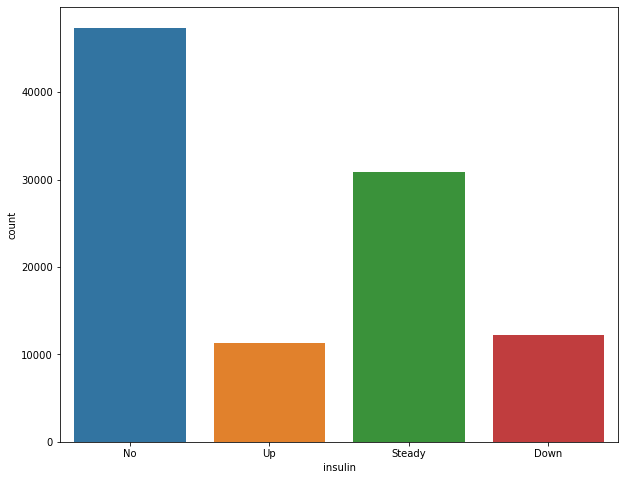

In [504]:
plt.figure(figsize=(10,8))
sns.countplot(df['insulin'])
plt.show()   #insulin given to patients at different levels

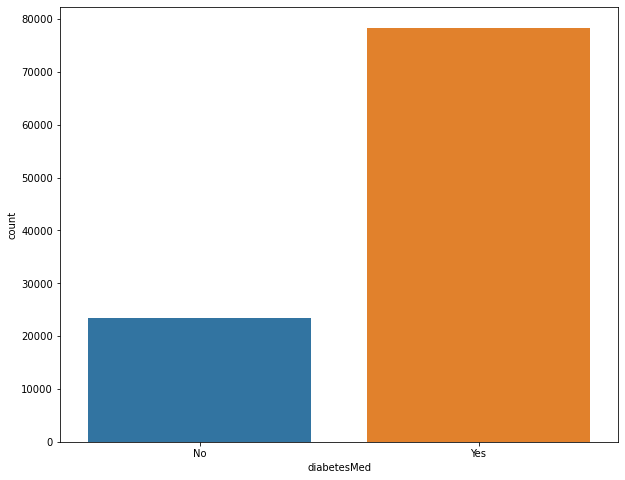

In [505]:
plt.figure(figsize=(10,8))

sns.countplot(df['diabetesMed'])
plt.show()
# Majority of patients took medication as per the below graph.

In [506]:
df['diag_1'] = df['diag_1'].fillna('Unknown')
df['diag_2'] = df['diag_2'].fillna('Unknown')
df['diag_3'] = df['diag_3'].fillna('Unknown')

# All NaN values is replaced by Unknown.

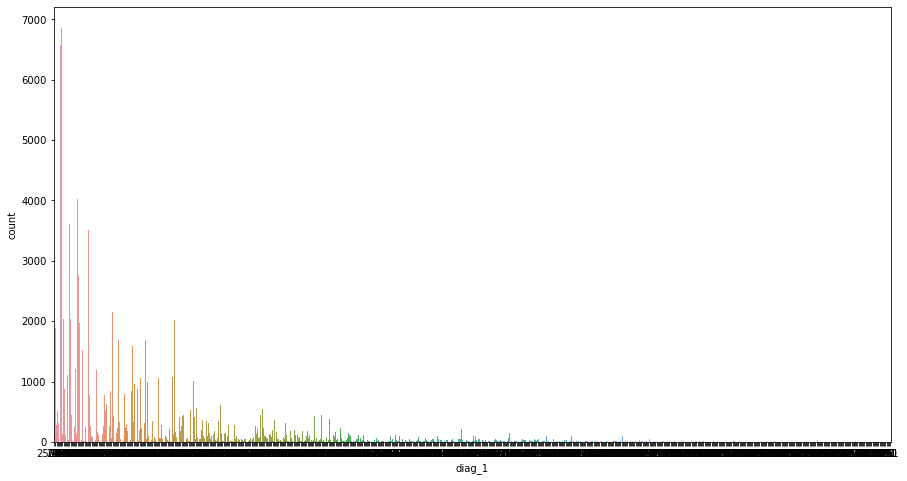

In [507]:
plt.figure(figsize=(15,8))
sns.countplot(df['diag_1'] )
plt.show()

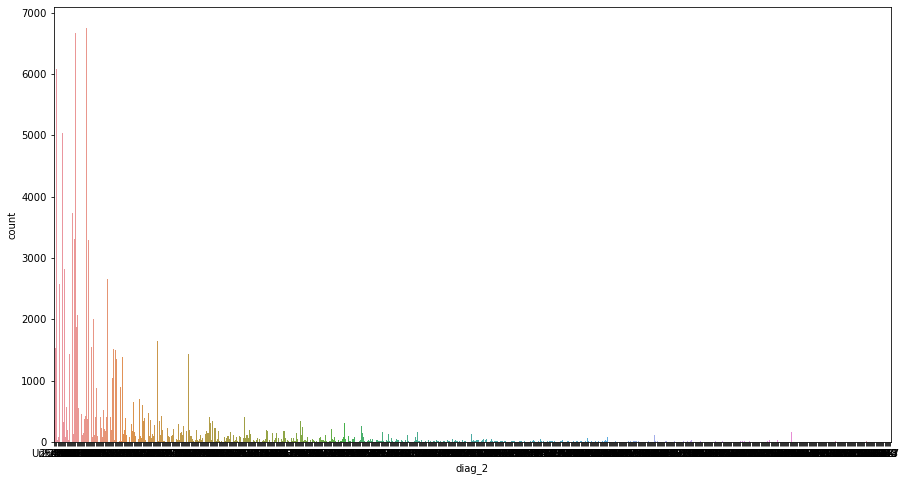

In [508]:
plt.figure(figsize=(15,8))
sns.countplot(df['diag_2'] )
plt.show()

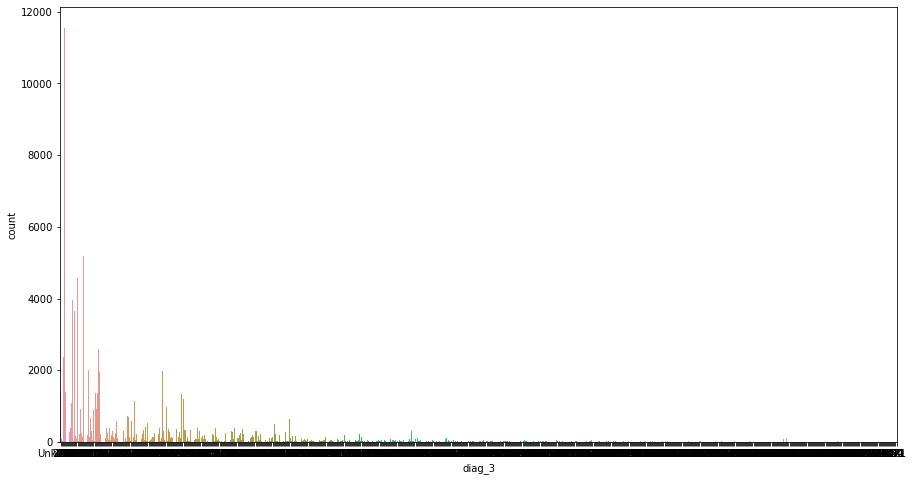

In [509]:
plt.figure(figsize=(15,8))
sns.countplot(df['diag_3'] )
plt.show()

In [510]:
#df['readmitted']=df['readmitted'].replace('NO',0)

In [511]:
#df['readmitted']=df['readmitted'].replace('>30',1)

In [512]:
#df['readmitted']=df['readmitted'].replace('<30',2)

In [513]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,med_spec
0,2278392,8222157,Caucasian,Female,5,6,25,1,1,Unknown,...,No,No,No,No,No,No,No,No,NO,Other
1,149190,55629189,Caucasian,Female,15,1,1,7,3,Unknown,...,Up,No,No,No,No,No,Ch,Yes,>30,Unknown
2,64410,86047875,AfricanAmerican,Female,25,1,1,7,2,Unknown,...,No,No,No,No,No,No,No,Yes,NO,Unknown
3,500364,82442376,Caucasian,Male,35,1,1,7,2,Unknown,...,Up,No,No,No,No,No,Ch,Yes,NO,Unknown
4,16680,42519267,Caucasian,Male,45,1,1,7,1,Unknown,...,Steady,No,No,No,No,No,Ch,Yes,NO,Unknown


# Bi-Variate Analysis (Numerical And Numerical)

['time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses']

In [514]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  int64 
 5   admission_type_id         101766 non-null  int64 
 6   discharge_disposition_id  101766 non-null  int64 
 7   admission_source_id       101766 non-null  int64 
 8   time_in_hospital          101766 non-null  int64 
 9   payer_code                101766 non-null  object
 10  medical_specialty         101766 non-null  object
 11  num_lab_procedures        101766 non-null  int64 
 12  num_procedures            101766 non-null  int64 
 13  num_medications           101766 non-null  int64 
 14  numb

Bivariate analysis of age and time spent in hospital

<AxesSubplot:xlabel='age', ylabel='time_in_hospital'>

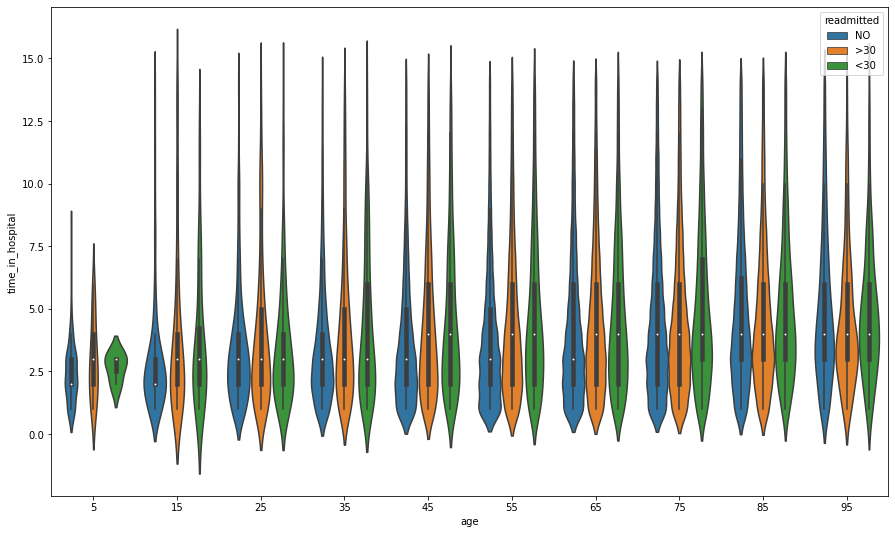

In [515]:
plt.figure(figsize=(15,9))
sns.violinplot(df['age'],df['time_in_hospital'],hue=df['readmitted'])

For people in the age group 50–70 (represented by ‘55’ and ‘65’) we can clearly see a pattern where patients that stay longer are more likely to be readmitted. This is evident from the median stay value represented by white dot insidde the boxplot in violin plot.
Similarly, people above 55 years of age that stay longer are more likely to be readmitted.

In [516]:
#Bivariate analysis of gender and number of diagnosis

<AxesSubplot:xlabel='gender', ylabel='time_in_hospital'>

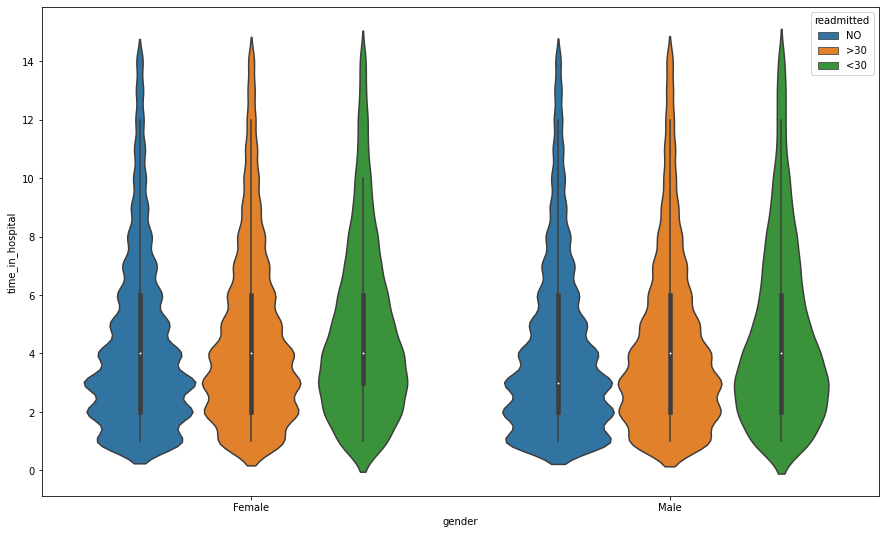

In [517]:
plt.figure(figsize=(15,9))
sns.violinplot(df['gender'],df['time_in_hospital'],hue=df['readmitted'])

In [518]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,med_spec
0,2278392,8222157,Caucasian,Female,5,6,25,1,1,Unknown,...,No,No,No,No,No,No,No,No,NO,Other
1,149190,55629189,Caucasian,Female,15,1,1,7,3,Unknown,...,Up,No,No,No,No,No,Ch,Yes,>30,Unknown
2,64410,86047875,AfricanAmerican,Female,25,1,1,7,2,Unknown,...,No,No,No,No,No,No,No,Yes,NO,Unknown
3,500364,82442376,Caucasian,Male,35,1,1,7,2,Unknown,...,Up,No,No,No,No,No,Ch,Yes,NO,Unknown
4,16680,42519267,Caucasian,Male,45,1,1,7,1,Unknown,...,Steady,No,No,No,No,No,Ch,Yes,NO,Unknown


In [519]:
cols_cat

['race',
 'gender',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'payer_code',
 'readmitted']

<AxesSubplot:xlabel='age', ylabel='count'>

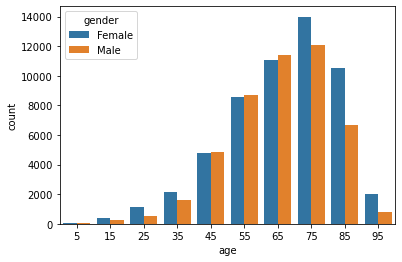

In [520]:
sns.countplot(x='age',hue='gender',data=df)

In [521]:
############################################################################################################################

# Statistical Test

In [522]:
############################################################################################################################

In [523]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  int64 
 5   admission_type_id         101766 non-null  int64 
 6   discharge_disposition_id  101766 non-null  int64 
 7   admission_source_id       101766 non-null  int64 
 8   time_in_hospital          101766 non-null  int64 
 9   payer_code                101766 non-null  object
 10  medical_specialty         101766 non-null  object
 11  num_lab_procedures        101766 non-null  int64 
 12  num_procedures            101766 non-null  int64 
 13  num_medications           101766 non-null  int64 
 14  numb

## Chi-Square Test

The Chi-square test of association evaluates relationships between categorical variables. 

In [524]:
cols_cat

['race',
 'gender',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'payer_code',
 'readmitted']

In [525]:
import scipy.stats as st
for i in cols_cat[:-1]:
    t=pd.crosstab(df['readmitted'],df[i])
    print('p-value for',i,'Feature',st.chi2_contingency(t)[1])

p-value for race Feature 7.379468859169466e-55
p-value for gender Feature 2.770917076035657e-08
p-value for max_glu_serum Feature 1.9333043719858424e-09
p-value for A1Cresult Feature 3.8557506428457006e-13
p-value for metformin Feature 2.445917224450868e-20
p-value for repaglinide Feature 7.30264733826178e-11
p-value for nateglinide Feature 0.7540947640191192
p-value for chlorpropamide Feature 0.17609040499295012
p-value for glimepiride Feature 0.010640757837452677
p-value for acetohexamide Feature 0.3939550321198431
p-value for glipizide Feature 6.551146454565371e-10
p-value for glyburide Feature 0.12491427254213221
p-value for tolbutamide Feature 0.4415389332203521
p-value for pioglitazone Feature 4.04284978483877e-05
p-value for rosiglitazone Feature 1.1618725247673921e-07
p-value for acarbose Feature 3.17561437847745e-06
p-value for miglitol Feature 0.07165815822964704
p-value for troglitazone Feature 0.4878015804003256
p-value for tolazamide Feature 0.2785564035772044
p-value for 

H0: Null Hypothesis: The categorical value does not have any significant contirbution for prediction of Y(Target variable). In other words, there are no relationship between the categorical variables.

H1: Alternative Hypothesis: The categorical value have significant contribution for prediction of Y (Target variable). In other words, there are relationship between categorical variables.

A p-value less than 0.05 (typically ≤ 0.05) is statistically significant. It indicates strong evidence against the null hypothesis, as there is less than a 5% probability the null is correct (and the results are random). Therefore, we reject the null hypothesis, and accept the alternative hypothesis.

A p-value higher than 0.05 (> 0.05) is not statistically significant and indicates strong evidence for the null hypothesis. This means we retain the null hypothesis and reject the alternative hypothesis.

From the table we can infer that insulin, payer_code, diabetesMed, race, change, metformin, A1Cresult, repaglinide, glipizide, max_glu_serum, gender,, rosiglitazone, acarbose, pioglitazone, glimepiride are statistically significant. It indicates strong evidence against the null hypothesis, as there is less than a 5% probability the null is correct (and the results are random). Therefore, we reject the null hypothesis, and accept the alternative hypothesis (H1). This mean that these categorical values have significant contribution for prediction of the target variable, Readmitted. Out of these statistically significant features, insulin was found to be highly associated with the target variable and glimepriride was found to be less associated as compared to the above reported features.

On the other hand p values for miglitol, glyburide, chlorpropamide, glyburide-metformin, tolazamide, glipizide-metformin, acetohexamide, glimepiride-pioglitazone, metformin-rosiglitazone, tolbutamide, troglitazone, metformin-pioglitazone, nateglinide were found to be greater than 0.05. This implies that these features are statistically insignificant and hence we accept the null hypothesis for these features. These features do not add any noteworthy contribution in predicting the readmission of patients.  

In [526]:
import scipy.stats as st
for i in cols_cat[:-1]:
    t=pd.crosstab(df['readmitted'],df[i])
    print('c-value for',i,'Feature',st.chi2_contingency(t)[0])

c-value for race Feature 282.5948012851926
c-value for gender Feature 34.80300480833009
c-value for max_glu_serum Feature 51.92209834623324
c-value for A1Cresult Feature 70.12429926076733
c-value for metformin Feature 104.84177702756085
c-value for repaglinide Feature 58.964856694790434
c-value for nateglinide Feature 3.423677960382098
c-value for chlorpropamide Feature 8.955602317288772
c-value for glimepiride Feature 16.65443870282871
c-value for acetohexamide Feature 1.8630370157464875
c-value for glipizide Feature 54.255693981660556
c-value for glyburide Feature 9.993778320408122
c-value for tolbutamide Feature 1.634978157723085
c-value for pioglitazone Feature 29.93580837055914
c-value for rosiglitazone Feature 43.008602046281275
c-value for acarbose Feature 35.68366868156398
c-value for miglitol Feature 11.594219729159184
c-value for troglitazone Feature 1.4356931067049987
c-value for tolazamide Feature 5.08630244035376
c-value for insulin Feature 516.695760681305
c-value for gly

In [527]:
import scipy.stats as st
for i in cols_cat[:-1]:
    t=pd.crosstab(df['readmitted'],df[i])
    print('dof for',i,'Feature',st.chi2_contingency(t)[2])

dof for race Feature 10
dof for gender Feature 2
dof for max_glu_serum Feature 6
dof for A1Cresult Feature 6
dof for metformin Feature 6
dof for repaglinide Feature 6
dof for nateglinide Feature 6
dof for chlorpropamide Feature 6
dof for glimepiride Feature 6
dof for acetohexamide Feature 2
dof for glipizide Feature 6
dof for glyburide Feature 6
dof for tolbutamide Feature 2
dof for pioglitazone Feature 6
dof for rosiglitazone Feature 6
dof for acarbose Feature 6
dof for miglitol Feature 6
dof for troglitazone Feature 2
dof for tolazamide Feature 4
dof for insulin Feature 6
dof for glyburide-metformin Feature 6
dof for glipizide-metformin Feature 2
dof for glimepiride-pioglitazone Feature 2
dof for metformin-rosiglitazone Feature 2
dof for metformin-pioglitazone Feature 2
dof for change Feature 2
dof for diabetesMed Feature 2
dof for payer_code Feature 34


## ANOVA Test

ANOVA stands for "Analysis of Variance" and is an omnibus test, meaning it tests for a difference overall between all groups. The one-way ANOVA, also referred to as one factor ANOVA, is a parametric test used to test for a statistically significant difference of an outcome between 3 or more groups.

In [528]:
# Assumptions needs to be checked? 

In [529]:
cols_num

['encounter_id',
 'patient_nbr',
 'age',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses']

In [530]:
g1 = df[df['readmitted']=='NO']
g2 = df[df['readmitted']=='>30']
g3 = df[df['readmitted']=='<30']

In [531]:
from scipy.stats import f_oneway

for i in cols_num:
    pval = f_oneway(g1[i],g2[i],g3[i])
    print('pvalue for', i ,':',pval)
    

pvalue for encounter_id : F_onewayResult(statistic=76.8809474984767, pvalue=4.327413514034769e-34)
pvalue for patient_nbr : F_onewayResult(statistic=306.2443524326985, pvalue=2.502753844700328e-133)
pvalue for age : F_onewayResult(statistic=49.212451650170834, pvalue=4.341431521898956e-22)
pvalue for time_in_hospital : F_onewayResult(statistic=170.33088561750944, pvalue=1.411815390386835e-74)
pvalue for num_lab_procedures : F_onewayResult(statistic=80.21071773284646, pvalue=1.557243276756841e-35)
pvalue for num_procedures : F_onewayResult(statistic=103.54126709214778, pvalue=1.1975406517965434e-45)
pvalue for num_medications : F_onewayResult(statistic=136.74921080848245, pvalue=4.900463977647552e-60)
pvalue for number_outpatient : F_onewayResult(statistic=355.23269329892986, pvalue=1.82159082912971e-154)
pvalue for number_emergency : F_onewayResult(statistic=573.257192814048, pvalue=2.688984098469832e-248)
pvalue for number_inpatient : F_onewayResult(statistic=2963.3238431258374, pvalu

Null Hypothesis – H0 : There is no significant difference among the groups.
Alternate Hypothesis – H1 : There is a significant difference among the groups.

From the table we can infer that the features, age, encounter_id, num_lab_procedures
num_procedures, num_medications, time_in_hospital, patient_nbr, number_outpatient
number_emergency, number_diagnoses, number_inpatient are having p values less than 0.05. Hence, we reject null hypothesis and accept alternative hypothesis. This suggests that there is significant difference between the groups of individual features and its effect on the target variable, readmitted.

In [532]:
df.head(2)

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,med_spec
0,2278392,8222157,Caucasian,Female,5,6,25,1,1,Unknown,...,No,No,No,No,No,No,No,No,NO,Other
1,149190,55629189,Caucasian,Female,15,1,1,7,3,Unknown,...,Up,No,No,No,No,No,Ch,Yes,>30,Unknown


In [533]:
df1=df.drop(columns=['diag_1','diag_2','diag_3'],axis=1)

#Primary (“diag_1”), Secondary (“diag_2”) and Additional (“diag_3”) diagnoses have missing values and hence we dropped them.

In [156]:
df1['admission_type_id']=df1['admission_type_id'].astype('int64')
df1['discharge_disposition_id']=df1['discharge_disposition_id'].astype('int64')
df1['admission_source_id']=df1['admission_source_id'].astype('int64')

In [542]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

df1['race']=LE.fit_transform(df1['race'])
df1['gender']=LE.fit_transform(df1['gender'])
df1['payer_code']=LE.fit_transform(df1['payer_code'])
df1['medical_specialty']=LE.fit_transform(df1['medical_specialty'])
df1['max_glu_serum']=LE.fit_transform(df1['max_glu_serum'])
df1['A1Cresult']=LE.fit_transform(df1['A1Cresult'])
df1['metformin']=LE.fit_transform(df1['metformin'])
df1['repaglinide']=LE.fit_transform(df1['repaglinide'])
df1['nateglinide']=LE.fit_transform(df1['nateglinide'])
df1['chlorpropamide']=LE.fit_transform(df1['chlorpropamide'])
df1['glimepiride']=LE.fit_transform(df1['glimepiride'])
df1['acetohexamide']=LE.fit_transform(df1['acetohexamide'])
df1['glipizide']=LE.fit_transform(df1['glipizide'])
df1['glyburide']=LE.fit_transform(df1['glyburide'])
df1['tolbutamide']=LE.fit_transform(df1['tolbutamide'])
df1['pioglitazone']=LE.fit_transform(df1['pioglitazone'])
df1['rosiglitazone']=LE.fit_transform(df1['rosiglitazone'])
df1['acarbose']=LE.fit_transform(df1['acarbose'])
df1['miglitol']=LE.fit_transform(df1['miglitol'])
df1['troglitazone']=LE.fit_transform(df1['troglitazone'])
df1['tolazamide']=LE.fit_transform(df1['tolazamide'])
df1['examide']=LE.fit_transform(df1['examide'])
df1['citoglipton']=LE.fit_transform(df1['citoglipton'])
df1['insulin']=LE.fit_transform(df1['insulin'])
df1['glyburide-metformin']=LE.fit_transform(df1['glyburide-metformin'])
df1['glipizide-metformin']=LE.fit_transform(df1['glipizide-metformin'])
df1['glimepiride-pioglitazone']=LE.fit_transform(df1['glimepiride-pioglitazone'])
df1['metformin-rosiglitazone']=LE.fit_transform(df1['metformin-rosiglitazone'])
df1['metformin-pioglitazone']=LE.fit_transform(df1['metformin-pioglitazone'])
df1['change']=LE.fit_transform(df['change'])
df1['med_spec']=LE.fit_transform(df['med_spec'])
df1['diabetesMed']=LE.fit_transform(df['diabetesMed'])
df1['readmitted']=LE.fit_transform(df['readmitted'])

#label encoding done for categorical columns to machine readable form

## Base model with logistic regression

In [447]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix

X=df1.drop('readmitted',axis=1)
y=df1['readmitted']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=1)

In [448]:
lr=LogisticRegression()
sc=StandardScaler()
sc.fit(X_train)
scaledX_train = sc.transform(X_train)
scaledX_test = sc.transform(X_test)
lr.fit(scaledX_train,y_train)
print("What is the Testing Accuracy")
print(lr.score(scaledX_test,y_test))
print("What is the Training Accuracy")
print(lr.score(scaledX_train,y_train))
predicted = lr.predict(scaledX_test)
print(predicted)
print(lr.predict_proba(scaledX_test))
print(confusion_matrix(y_test,predicted))
print(classification_report(y_test,predicted))

What is the Testing Accuracy
0.581821159515231
What is the Training Accuracy
0.5772643045651076
[2 2 1 ... 2 1 2]
[[0.09608304 0.29289801 0.61101895]
 [0.11083287 0.37897961 0.51018752]
 [0.19536221 0.50330059 0.30133721]
 ...
 [0.10800653 0.40822789 0.48376557]
 [0.21735859 0.50689148 0.27574992]
 [0.11197452 0.36332129 0.52470419]]
[[   32  1088  2200]
 [   35  3168  7458]
 [   26  1960 14563]]
              precision    recall  f1-score   support

           0       0.34      0.01      0.02      3320
           1       0.51      0.30      0.38     10661
           2       0.60      0.88      0.71     16549

    accuracy                           0.58     30530
   macro avg       0.48      0.40      0.37     30530
weighted avg       0.54      0.58      0.52     30530



## Decision tree

In [161]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
Y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, Y_pred))

print(metrics.classification_report(y_test,Y_pred))

Accuracy: 0.493678349164756
              precision    recall  f1-score   support

           0       0.16      0.17      0.17      3320
           1       0.42      0.42      0.42     10661
           2       0.62      0.60      0.61     16549

    accuracy                           0.49     30530
   macro avg       0.40      0.40      0.40     30530
weighted avg       0.50      0.49      0.50     30530



## Naive Bayes

In [162]:
# training the model on training set
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train, y_train)

# making predictions on the testing set
y_pred = NB.predict(X_test)

# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)
print(metrics.classification_report(y_test,y_pred))

Gaussian Naive Bayes model accuracy(in %): 54.20569931215198
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3320
           1       0.00      0.00      0.00     10661
           2       0.54      1.00      0.70     16549

    accuracy                           0.54     30530
   macro avg       0.18      0.33      0.23     30530
weighted avg       0.29      0.54      0.38     30530



## Random forest

In [163]:
#Fitting Decision Tree classifier to the training set  
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(X_train, y_train) 
y_pred=classifier.predict(X_test)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.23      0.08      0.12      3320
           1       0.47      0.47      0.47     10661
           2       0.64      0.72      0.68     16549

    accuracy                           0.56     30530
   macro avg       0.45      0.42      0.42     30530
weighted avg       0.54      0.56      0.54     30530



## Adaboost

In [164]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators = 40, random_state = 10)

ada.fit(X_train, y_train)

y_pred = ada.predict(X_test)

from sklearn.metrics import accuracy_score

print('Accuracy :',accuracy_score(y_test, y_pred))

print(metrics.classification_report(y_test,y_pred))

Accuracy : 0.5951195545365214
              precision    recall  f1-score   support

           0       0.35      0.02      0.03      3320
           1       0.52      0.39      0.44     10661
           2       0.62      0.84      0.72     16549

    accuracy                           0.60     30530
   macro avg       0.50      0.42      0.40     30530
weighted avg       0.56      0.60      0.55     30530



## Gradient boosting

In [82]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators = 100, max_depth = 3, random_state = 10)

gbc.fit(X_train, y_train)

y_pred = gbc.predict(X_test)

from sklearn.metrics import accuracy_score

print('Accuracy :',accuracy_score(y_test, y_pred))

print(metrics.classification_report(y_test,y_pred))

Accuracy : 0.6085489682279724
              precision    recall  f1-score   support

           0       0.44      0.03      0.06      3320
           1       0.53      0.43      0.48     10661
           2       0.64      0.84      0.73     16549

    accuracy                           0.61     30530
   macro avg       0.54      0.43      0.42     30530
weighted avg       0.58      0.61      0.57     30530



In [338]:
pip install xgboost classifier

Note: you may need to restart the kernel to use updated packages.


## XG Boosting

In [339]:
from xgboost import XGBClassifier

xgb = XGBClassifier(learning_rate = 0.01, gamma = 2)

xgb.fit(X_train, y_train)

from sklearn.metrics import roc_auc_score, classification_report

y_pred = xgb.predict(X_test)

print('AUC score :', accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

[17:58:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
AUC score : 0.5965607599082869
              precision    recall  f1-score   support

           0       0.44      0.02      0.04      3320
           1       0.52      0.39      0.45     10661
           2       0.63      0.84      0.72     16549

    accuracy                           0.60     30530
   macro avg       0.53      0.42      0.40     30530
weighted avg       0.57      0.60      0.55     30530



In [165]:
df1.shape

(101766, 47)

# new feature creation

In [167]:
df1['Service Utilization'] = df1['number_inpatient']+df1['number_outpatient']

#We will add a new feature to the dataset — “Service Utilization” by adding the two features — “number_inpatient” and “number_outpatient” visits for a given patient in the previous year. These variables represent how much hospital services a patient has used in the past year.

# reducing unique features 

In [169]:
def fun(x):
    if (x==1) | (x==2) | (x==7) :
        return 1
    if (x==5) | (x==6) | (x==8) :
        return 2
    else:
        return x

In [170]:
df1['admission_type_id'] = df1['admission_type_id'].apply(fun)

In [171]:
df1['admission_type_id'].unique()

array([2, 1, 3, 4], dtype=int64)

In [ ]:
#Admission types 1, 2 and 7 correspond to Emergency, Urgent Care and Trauma, and were combined into a single category.
#Admission types 5, 6 and 8 correspond to Not Available, NULL and Not Mapped, and were combined into another single category.

In [172]:
# reduce unique

In [173]:
df1['discharge_disposition_id'].unique()

array([25,  1,  3,  6,  2,  5, 11,  7, 10,  4, 14, 18,  8, 13, 12, 16, 17,
       22, 23,  9, 20, 15, 24, 28, 19, 27], dtype=int64)

In [174]:
def ddid(x):
    if (x==1) | (x==6) | (x==8) | (x==9) | (x==13):
        return 1
    if (x==2) | (x==3) | (x==4) | (x==5) | (x==14) | (x==22) | (x==23) | (x==24):
        return 2
    if (x==10) | (x==12) | (x==15) | (x==16) | (x==17) :
        return 3
    if (x==18) | (x==25) | (x==26) :
        return 4
    else:
        return x

Feature: 0, Score: 0.07846
Feature: 1, Score: 0.05666
Feature: 2, Score: 0.01096
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.02850
Feature: 5, Score: 0.01842
Feature: 6, Score: 0.08063
Feature: 7, Score: 0.02764
Feature: 8, Score: 0.00876
Feature: 9, Score: 0.01708
Feature: 10, Score: 0.01775
Feature: 11, Score: 0.01043
Feature: 12, Score: 0.01176
Feature: 13, Score: 0.01600
Feature: 14, Score: 0.03622
Feature: 15, Score: 0.03187
Feature: 16, Score: 0.36764
Feature: 17, Score: 0.05167
Feature: 18, Score: 0.01189
Feature: 19, Score: 0.00882
Feature: 20, Score: 0.00622
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00854
Feature: 27, Score: 0.00750
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.01524
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000
Fe

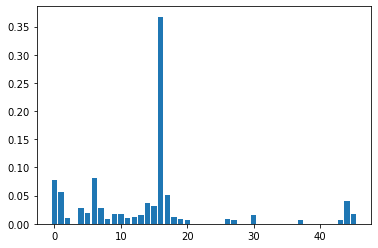

In [340]:
#For XG boost
# get importance
importance = xgb.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# Building model with significant features

In [175]:
df1['discharge_disposition_id'] = df1['discharge_disposition_id'].apply(ddid)

In [ ]:
#Discharged to home (1), Discharged/transferred to home with home health service (6), Discharged/transferred to home under the care of Home IV provider (8), Admitted as an inpatient to this hospital (9) and Hospice/home (13) have been re-encoded into a single category.
#Discharged/transferred to another short term hospital(2), Discharged/transferred to SNF(3), Discharged/transferred to ICF(4), Discharged/transferred to another type of inpatient care institution (5), Hospice / medical facility (14), Discharged/transferred to another rehab fac including rehab units of a hospital(22), Discharged/transferred to a long term care hospital(23), Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare(24) have been re-encoded into a single category.
#Neonate discharged to another hospital for neonatal aftercare(10), Still patient or expected to return for outpatient services(12), Discharged/transferred within this institution to Medicare approved swing bed(15), Discharged/transferred/referred another institution for outpatient services(16), Discharged/transferred/referred to this institution for outpatient services(17) have been re-encoded into a single category.
#NULL (18), Not Mapped (25) and Unknown/Invalid (26) have been mapped into a single category.

In [176]:
data_final = df1[df1['patient_nbr'].duplicated(keep='first')==False]

In [177]:
data_final.shape

(71518, 48)

In [178]:
t = df['patient_nbr'].value_counts()

In [179]:
visit = pd.DataFrame()
visit['number'] = t.index
visit['no of times'] = t.values

In [180]:
visit

,number,no of times
0,88785891,40
1,43140906,28
2,88227540,23
3,1660293,23
4,23199021,23
...,...,...
71513,66733983,1
71514,20299680,1
71515,112545,1
71516,55422882,1


In [181]:
final = pd.merge(df1,visit,how='inner',left_on='patient_nbr',right_on='number')

In [182]:
final.drop('number',axis=1,inplace=True)

In [183]:
final.shape

(101766, 49)

In [184]:
final.head(3)

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,med_spec,Service Utilization,no of times
0,2278392,8222157,2,0,5,2,4,1,1,16,...,0,0,0,0,1,0,2,7,0,1
1,149190,55629189,2,0,15,1,1,7,3,16,...,0,0,0,0,0,1,1,10,0,1
2,64410,86047875,0,0,25,1,1,7,2,16,...,0,0,0,0,1,1,2,10,3,1


In [185]:
final['readmitted'].value_counts()

2    54864
1    35545
0    11357
Name: readmitted, dtype: int64

In [ ]:
#2 represents No readmission
#1 represents >30
#0 represents <30

In [186]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
sfs = SequentialFeatureSelector(estimator=rf,k_features='best',forward=True,scoring='accuracy',verbose=2,n_jobs=-1)

In [187]:
X=final.drop('readmitted',axis=1)
y=final['readmitted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=1)

In [188]:
#sfs.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  2.8min finished

[2021-07-01 09:04:47] Features: 1/48 -- score: 0.6713459411276317[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  47 out of  47 | elapsed:  2.8min finished

[2021-07-01 09:07:34] Features: 2/48 -- score: 0.7154247954404498[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  46 out of  46 | elapsed:  3.5min finished

[2021-07-01 09:11:07] Features: 3/48 -- score: 0.7173619961246015[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  45 out o

[Parallel(n_jobs=-1)]: Done  10 out of  16 | elapsed:  6.7min remaining:  4.0min
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:  6.9min finished

[2021-07-01 12:39:35] Features: 33/48 -- score: 0.6916025594718228[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:  3.8min remaining:  3.3min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  6.4min finished

[2021-07-01 12:45:59] Features: 34/48 -- score: 0.6905216567555008[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  14 | elapsed:  3.9min remaining:  3.9min
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:  6.1min finished

[2021-07-01 12:52:05] Features: 35/48 -- score: 0.6896091888805298[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  13 | elapsed:  3.0min remaining:  4.8min
[Parallel(n_jobs=-1)]: Done  13 ou

SequentialFeatureSelector(estimator=RandomForestClassifier(), k_features='best',
                          n_jobs=-1, scoring='accuracy', verbose=2)

In [199]:
#bestfeatures=sfs.k_feature_names_
#bestfeatures

In [190]:
final1=['encounter_id','patient_nbr','race','gender','age','admission_type_id','discharge_disposition_id',
        'admission_source_id','payer_code','medical_specialty','num_lab_procedures','num_medications','number_outpatient',
        'number_emergency','number_inpatient','number_diagnoses','max_glu_serum','A1Cresult','metformin','repaglinide',
        'nateglinide','chlorpropamide','glimepiride','acetohexamide','glipizide','glyburide','tolbutamide','pioglitazone',
        'rosiglitazone','acarbose','miglitol','troglitazone','tolazamide','examide','citoglipton','insulin',
        'glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone',
        'metformin-pioglitazone','change','diabetesMed','Service Utilization','no of times']


In [191]:
final1=final.drop(['time_in_hospital','num_procedures','med_spec'],axis=1)


In [192]:
X=final1.drop('readmitted',axis=1)
y=final1['readmitted']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=1)

## Logistic regression

In [194]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
lr1=LogisticRegression()
sc=StandardScaler()
sc.fit(X_train)
scaledX_train = sc.transform(X_train)
scaledX_test = sc.transform(X_test)

lr1.fit(scaledX_train,y_train)
print("What is the Testing Accuracy")
print(lr1.score(scaledX_test,y_test))
print("What is the Training Accuracy")
print(lr1.score(scaledX_train,y_train))

predicted = lr1.predict(scaledX_test)
print(predicted)
print(lr1.predict_proba(scaledX_test))

from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predicted))
print(classification_report(y_test,predicted))

What is the Testing Accuracy
0.6816901408450704
What is the Training Accuracy
0.6808636082879443
[1 1 2 ... 2 1 1]
[[0.17322414 0.47705845 0.34971741]
 [0.22851244 0.38634439 0.38514318]
 [0.05449593 0.20656353 0.73894054]
 ...
 [0.07269349 0.23602997 0.69127654]
 [0.20412971 0.51235597 0.28351431]
 [0.10483486 0.51590554 0.3792596 ]]
[[   55  2013  1304]
 [   53  5811  4848]
 [   16  1484 14946]]
              precision    recall  f1-score   support

           0       0.44      0.02      0.03      3372
           1       0.62      0.54      0.58     10712
           2       0.71      0.91      0.80     16446

    accuracy                           0.68     30530
   macro avg       0.59      0.49      0.47     30530
weighted avg       0.65      0.68      0.64     30530



## Decision tree

In [196]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,cohen_kappa_score

DT1 = DecisionTreeClassifier(min_samples_leaf=5,min_samples_split=10)
DT1.fit(X_train,y_train)
y_prediction = DT1.predict(X_test)
print('Classification report:')
print(classification_report(y_test,y_prediction))

Classification report:
              precision    recall  f1-score   support

           0       0.27      0.25      0.26      3372
           1       0.56      0.57      0.56     10712
           2       0.78      0.78      0.78     16446

    accuracy                           0.65     30530
   macro avg       0.53      0.53      0.53     30530
weighted avg       0.64      0.65      0.65     30530



## Randomforest

In [200]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,roc_auc_score
from warnings import filterwarnings
filterwarnings('ignore')

RandFC1 = RandomForestClassifier()
RandFC1.fit(X_train,y_train)

y_tprediction = RandFC1.predict(X_train)

print('Accuracy Train :',accuracy_score(y_train,y_tprediction))
print('Confusion matrix Train :',confusion_matrix(y_train,y_tprediction))

print()

y_test_prediction = RandFC1.predict(X_test)

RandomForest_Accuracy = accuracy_score(y_test,y_test_prediction)*100
print('Accuracy Test :',accuracy_score(y_test,y_test_prediction))
print('Confusion matrix Test :',confusion_matrix(y_test,y_test_prediction))

print()

print('Calssification Report :')
print(classification_report(y_test,y_test_prediction))

Accuracy Train : 0.9999859621539671
Confusion matrix Train : [[ 7985     0     0]
 [    0 24832     1]
 [    0     0 38418]]

Accuracy Test : 0.7266622993776614
Confusion matrix Test : [[  198  2449   725]
 [  184  7321  3207]
 [   67  1713 14666]]

Calssification Report :
              precision    recall  f1-score   support

           0       0.44      0.06      0.10      3372
           1       0.64      0.68      0.66     10712
           2       0.79      0.89      0.84     16446

    accuracy                           0.73     30530
   macro avg       0.62      0.54      0.53     30530
weighted avg       0.70      0.73      0.69     30530



## Adaboost

In [202]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,roc_auc_score
from warnings import filterwarnings
filterwarnings('ignore')

Adaboost_model1 = AdaBoostClassifier()
Adaboost_model1.fit(X_train,y_train)

y_tprediction = Adaboost_model1.predict(X_train)

print('Accuracy Train :',accuracy_score(y_train,y_tprediction))
print('Confusion matrix Train :',confusion_matrix(y_train,y_tprediction))

print()

y_test_prediction = Adaboost_model1.predict(X_test)

AdaBoost_Accuracy = accuracy_score(y_test,y_test_prediction)*100
print('Accuracy Test :',accuracy_score(y_test,y_test_prediction))
print('Confusion matrix Test :',confusion_matrix(y_test,y_test_prediction))

print()

print('Calssification Report :')
print(classification_report(y_test,y_test_prediction))


Accuracy Train : 0.703001291481835
Confusion matrix Train : [[  324  5769  1892]
 [  404 16871  7558]
 [  129  5405 32884]]

Accuracy Test : 0.7011136586963642
Confusion matrix Test : [[  154  2447   771]
 [  188  7274  3250]
 [   67  2402 13977]]

Calssification Report :
              precision    recall  f1-score   support

           0       0.38      0.05      0.08      3372
           1       0.60      0.68      0.64     10712
           2       0.78      0.85      0.81     16446

    accuracy                           0.70     30530
   macro avg       0.58      0.52      0.51     30530
weighted avg       0.67      0.70      0.67     30530



## XGboost

In [204]:
from xgboost import XGBClassifier

xgb1 = XGBClassifier(learning_rate = 0.01, gamma = 2)

xgb1.fit(X_train, y_train)

from sklearn.metrics import roc_auc_score, classification_report

y_pred = xgb1.predict(X_test)

print('AUC score :', accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

[13:23:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
AUC score : 0.7241729446446119
              precision    recall  f1-score   support

           0       0.50      0.02      0.04      3372
           1       0.64      0.67      0.65     10712
           2       0.78      0.91      0.84     16446

    accuracy                           0.72     30530
   macro avg       0.64      0.53      0.51     30530
weighted avg       0.70      0.72      0.68     30530



## Catboost

In [206]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [207]:
from catboost import CatBoostClassifier
cat1 = CatBoostClassifier()
cat1.fit(X_train,y_train)
cat1.predict(X_test)


Learning rate set to 0.098358
0:	learn: 1.0313274	total: 203ms	remaining: 3m 22s
1:	learn: 0.9770619	total: 232ms	remaining: 1m 55s
2:	learn: 0.9343874	total: 256ms	remaining: 1m 25s
3:	learn: 0.8994844	total: 285ms	remaining: 1m 10s
4:	learn: 0.8705573	total: 313ms	remaining: 1m 2s
5:	learn: 0.8461940	total: 338ms	remaining: 56s
6:	learn: 0.8248534	total: 368ms	remaining: 52.2s
7:	learn: 0.8082393	total: 392ms	remaining: 48.6s
8:	learn: 0.7929146	total: 423ms	remaining: 46.6s
9:	learn: 0.7785081	total: 453ms	remaining: 44.9s
10:	learn: 0.7671507	total: 479ms	remaining: 43.1s
11:	learn: 0.7571653	total: 505ms	remaining: 41.6s
12:	learn: 0.7490729	total: 558ms	remaining: 42.4s
13:	learn: 0.7419079	total: 584ms	remaining: 41.2s
14:	learn: 0.7349438	total: 610ms	remaining: 40s
15:	learn: 0.7290513	total: 639ms	remaining: 39.3s
16:	learn: 0.7240259	total: 666ms	remaining: 38.5s
17:	learn: 0.7188037	total: 690ms	remaining: 37.7s
18:	learn: 0.7152023	total: 714ms	remaining: 36.9s
19:	learn: 

160:	learn: 0.6429152	total: 5.22s	remaining: 27.2s
161:	learn: 0.6428053	total: 5.25s	remaining: 27.1s
162:	learn: 0.6426310	total: 5.28s	remaining: 27.1s
163:	learn: 0.6425408	total: 5.3s	remaining: 27s
164:	learn: 0.6423886	total: 5.34s	remaining: 27s
165:	learn: 0.6420817	total: 5.38s	remaining: 27s
166:	learn: 0.6420303	total: 5.4s	remaining: 26.9s
167:	learn: 0.6419337	total: 5.43s	remaining: 26.9s
168:	learn: 0.6418746	total: 5.46s	remaining: 26.9s
169:	learn: 0.6416140	total: 5.5s	remaining: 26.9s
170:	learn: 0.6414363	total: 5.54s	remaining: 26.9s
171:	learn: 0.6412607	total: 5.57s	remaining: 26.8s
172:	learn: 0.6411604	total: 5.6s	remaining: 26.8s
173:	learn: 0.6410208	total: 5.63s	remaining: 26.7s
174:	learn: 0.6408581	total: 5.66s	remaining: 26.7s
175:	learn: 0.6406758	total: 5.7s	remaining: 26.7s
176:	learn: 0.6405579	total: 5.72s	remaining: 26.6s
177:	learn: 0.6404915	total: 5.75s	remaining: 26.6s
178:	learn: 0.6401978	total: 5.79s	remaining: 26.6s
179:	learn: 0.6400989	t

324:	learn: 0.6238097	total: 9.9s	remaining: 20.6s
325:	learn: 0.6237006	total: 9.95s	remaining: 20.6s
326:	learn: 0.6236226	total: 9.97s	remaining: 20.5s
327:	learn: 0.6235393	total: 9.99s	remaining: 20.5s
328:	learn: 0.6234314	total: 10s	remaining: 20.4s
329:	learn: 0.6233484	total: 10s	remaining: 20.4s
330:	learn: 0.6232324	total: 10.1s	remaining: 20.3s
331:	learn: 0.6231731	total: 10.1s	remaining: 20.3s
332:	learn: 0.6231256	total: 10.1s	remaining: 20.2s
333:	learn: 0.6230700	total: 10.1s	remaining: 20.2s
334:	learn: 0.6229807	total: 10.2s	remaining: 20.2s
335:	learn: 0.6229045	total: 10.2s	remaining: 20.1s
336:	learn: 0.6227679	total: 10.2s	remaining: 20.1s
337:	learn: 0.6226788	total: 10.2s	remaining: 20s
338:	learn: 0.6226120	total: 10.3s	remaining: 20s
339:	learn: 0.6225686	total: 10.3s	remaining: 19.9s
340:	learn: 0.6225243	total: 10.3s	remaining: 19.9s
341:	learn: 0.6223796	total: 10.3s	remaining: 19.9s
342:	learn: 0.6222614	total: 10.3s	remaining: 19.8s
343:	learn: 0.6221187

483:	learn: 0.6103006	total: 14s	remaining: 14.9s
484:	learn: 0.6102546	total: 14s	remaining: 14.9s
485:	learn: 0.6101647	total: 14s	remaining: 14.8s
486:	learn: 0.6101278	total: 14s	remaining: 14.8s
487:	learn: 0.6100820	total: 14.1s	remaining: 14.8s
488:	learn: 0.6099562	total: 14.1s	remaining: 14.7s
489:	learn: 0.6098812	total: 14.1s	remaining: 14.7s
490:	learn: 0.6098310	total: 14.2s	remaining: 14.7s
491:	learn: 0.6097522	total: 14.2s	remaining: 14.6s
492:	learn: 0.6096887	total: 14.2s	remaining: 14.6s
493:	learn: 0.6096297	total: 14.2s	remaining: 14.6s
494:	learn: 0.6095604	total: 14.3s	remaining: 14.6s
495:	learn: 0.6094237	total: 14.3s	remaining: 14.5s
496:	learn: 0.6093006	total: 14.3s	remaining: 14.5s
497:	learn: 0.6092466	total: 14.3s	remaining: 14.5s
498:	learn: 0.6091936	total: 14.4s	remaining: 14.4s
499:	learn: 0.6090866	total: 14.4s	remaining: 14.4s
500:	learn: 0.6090564	total: 14.4s	remaining: 14.4s
501:	learn: 0.6088907	total: 14.4s	remaining: 14.3s
502:	learn: 0.608810

648:	learn: 0.5979989	total: 18.3s	remaining: 9.88s
649:	learn: 0.5979532	total: 18.3s	remaining: 9.85s
650:	learn: 0.5979253	total: 18.3s	remaining: 9.82s
651:	learn: 0.5978997	total: 18.3s	remaining: 9.79s
652:	learn: 0.5978028	total: 18.4s	remaining: 9.76s
653:	learn: 0.5977411	total: 18.4s	remaining: 9.73s
654:	learn: 0.5976691	total: 18.4s	remaining: 9.7s
655:	learn: 0.5976259	total: 18.4s	remaining: 9.67s
656:	learn: 0.5975701	total: 18.5s	remaining: 9.63s
657:	learn: 0.5975625	total: 18.5s	remaining: 9.61s
658:	learn: 0.5974859	total: 18.5s	remaining: 9.58s
659:	learn: 0.5974605	total: 18.5s	remaining: 9.55s
660:	learn: 0.5973826	total: 18.6s	remaining: 9.53s
661:	learn: 0.5973185	total: 18.6s	remaining: 9.5s
662:	learn: 0.5972331	total: 18.6s	remaining: 9.47s
663:	learn: 0.5971494	total: 18.7s	remaining: 9.45s
664:	learn: 0.5971288	total: 18.7s	remaining: 9.42s
665:	learn: 0.5970639	total: 18.7s	remaining: 9.39s
666:	learn: 0.5970220	total: 18.8s	remaining: 9.37s
667:	learn: 0.

811:	learn: 0.5878935	total: 22.4s	remaining: 5.2s
812:	learn: 0.5878207	total: 22.5s	remaining: 5.17s
813:	learn: 0.5877398	total: 22.5s	remaining: 5.14s
814:	learn: 0.5876942	total: 22.5s	remaining: 5.11s
815:	learn: 0.5876429	total: 22.6s	remaining: 5.09s
816:	learn: 0.5876231	total: 22.6s	remaining: 5.06s
817:	learn: 0.5875325	total: 22.6s	remaining: 5.03s
818:	learn: 0.5875040	total: 22.6s	remaining: 5s
819:	learn: 0.5874512	total: 22.7s	remaining: 4.97s
820:	learn: 0.5874027	total: 22.7s	remaining: 4.95s
821:	learn: 0.5873495	total: 22.7s	remaining: 4.92s
822:	learn: 0.5872543	total: 22.8s	remaining: 4.89s
823:	learn: 0.5871908	total: 22.8s	remaining: 4.87s
824:	learn: 0.5871271	total: 22.8s	remaining: 4.84s
825:	learn: 0.5870999	total: 22.8s	remaining: 4.81s
826:	learn: 0.5870388	total: 22.9s	remaining: 4.78s
827:	learn: 0.5869971	total: 22.9s	remaining: 4.76s
828:	learn: 0.5869434	total: 22.9s	remaining: 4.73s
829:	learn: 0.5868460	total: 23s	remaining: 4.7s
830:	learn: 0.58677

972:	learn: 0.5782340	total: 27.3s	remaining: 758ms
973:	learn: 0.5782008	total: 27.3s	remaining: 730ms
974:	learn: 0.5781266	total: 27.4s	remaining: 702ms
975:	learn: 0.5780673	total: 27.4s	remaining: 674ms
976:	learn: 0.5779947	total: 27.4s	remaining: 646ms
977:	learn: 0.5779101	total: 27.5s	remaining: 618ms
978:	learn: 0.5778222	total: 27.5s	remaining: 590ms
979:	learn: 0.5777423	total: 27.5s	remaining: 562ms
980:	learn: 0.5776836	total: 27.6s	remaining: 534ms
981:	learn: 0.5776303	total: 27.6s	remaining: 506ms
982:	learn: 0.5775753	total: 27.6s	remaining: 478ms
983:	learn: 0.5775125	total: 27.7s	remaining: 450ms
984:	learn: 0.5774741	total: 27.7s	remaining: 422ms
985:	learn: 0.5774473	total: 27.7s	remaining: 393ms
986:	learn: 0.5773963	total: 27.7s	remaining: 365ms
987:	learn: 0.5773121	total: 27.8s	remaining: 337ms
988:	learn: 0.5772422	total: 27.8s	remaining: 309ms
989:	learn: 0.5771823	total: 27.8s	remaining: 281ms
990:	learn: 0.5771059	total: 27.8s	remaining: 253ms
991:	learn: 

array([[1],
       [2],
       [2],
       ...,
       [2],
       [1],
       [1]], dtype=int64)

In [208]:
print(classification_report(y_test,cat1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.47      0.08      0.13      3372
           1       0.65      0.68      0.66     10712
           2       0.79      0.90      0.84     16446

    accuracy                           0.73     30530
   macro avg       0.63      0.55      0.55     30530
weighted avg       0.71      0.73      0.70     30530



## lightgbm

In [210]:
pip install lightgbm

In [211]:
import lightgbm as lgb
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,roc_auc_score
lgbmc=lgb.LGBMClassifier(random_state=4)
lgbmc.fit(X_train,y_train)

y_train_pred = lgbmc.predict(X_train)
y_train_prob = lgbmc.predict_proba(X_train)[:,1]
print("Accuracy Train:",accuracy_score(y_train,y_train_pred))
print("Confusion Matrix Train:\n",confusion_matrix(y_train,y_train_pred))
print('\n')
y_test_pred = lgbmc.predict(X_test)
y_test_prob = lgbmc.predict_proba(X_test)[:,1]
print("Accuracy Test:",accuracy_score(y_test,y_test_pred))
print("Confusion Matrix Test:\n",confusion_matrix(y_test,y_test_pred))
print("classification report:\n",classification_report(y_test,y_test_pred))

Accuracy Train: 0.7479785501712617
Confusion Matrix Train:
 [[  805  5404  1776]
 [  214 17237  7382]
 [   92  3085 35241]]


Accuracy Test: 0.7335080248935474
Confusion Matrix Test:
 [[  208  2446   718]
 [  168  7299  3245]
 [   43  1516 14887]]
classification report:
               precision    recall  f1-score   support

           0       0.50      0.06      0.11      3372
           1       0.65      0.68      0.66     10712
           2       0.79      0.91      0.84     16446

    accuracy                           0.73     30530
   macro avg       0.64      0.55      0.54     30530
weighted avg       0.71      0.73      0.70     30530



## Hyperparameter tuning with randomforest

In [214]:
rfc = RandomForestClassifier()
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

In [215]:
param_dist={'n_estimators':sp_randint(25,250),
            'max_features':sp_randint(1,7),
           'max_depth':sp_randint(2,15),
           'min_samples_leaf':sp_randint(1,20),
           'min_samples_split':sp_randint(2,50),
           'criterion':['gini','entropy']}

rsearch=RandomizedSearchCV(rfc,param_distributions=param_dist,
                           scoring='f1_weighted',
                              n_iter=10,cv=3,n_jobs=-1,random_state=4)
rsearch.fit(X,y)
rsearch.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'max_features': 6,
 'min_samples_leaf': 2,
 'min_samples_split': 42,
 'n_estimators': 112}

In [216]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,roc_auc_score

rfc = RandomForestClassifier(**rsearch.best_params_,random_state=4)# **Keyword argument

rfc.fit(X_train,y_train)
y_train_pred = rfc.predict(X_train)
y_train_prob = rfc.predict_proba(X_train)[:,1]
print("Accuracy Train:",accuracy_score(y_train,y_train_pred))
print("Confusion Matrix Train:\n",confusion_matrix(y_train,y_train_pred))

print('\n')
y_test_pred = rfc.predict(X_test)
y_test_prob = rfc.predict_proba(X_test)[:,1]
print("Accuracy Test:",accuracy_score(y_test,y_test_pred))
print("Confusion Matrix Test:\n",confusion_matrix(y_test,y_test_pred))
print('Calssification Report :')
print(classification_report(y_test,y_test_pred))


Accuracy Train: 0.7195238362625639
Confusion Matrix Train:
 [[   14  6208  1763]
 [    0 16983  7850]
 [    0  4159 34259]]


Accuracy Test: 0.7187684245004913
Confusion Matrix Test:
 [[    1  2659   712]
 [    1  7356  3355]
 [    0  1859 14587]]
Calssification Report :
              precision    recall  f1-score   support

           0       0.50      0.00      0.00      3372
           1       0.62      0.69      0.65     10712
           2       0.78      0.89      0.83     16446

    accuracy                           0.72     30530
   macro avg       0.63      0.52      0.49     30530
weighted avg       0.69      0.72      0.68     30530



## Hyperparameter tuning for xgbclassifier

In [219]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from xgboost import XGBClassifier
xgbc=XGBClassifier()
params={'n_estimators': sp_randint(10,50),"max_depth":sp_randint(1,8),
        'min_child_weight':[1,2],
       'learning_rate': sp_uniform(0,0.5),
       'gamma':sp_uniform(0,0.5)}
rsearch=RandomizedSearchCV(xgbc,param_distributions=params,cv=3,
                  n_iter=50,scoring='f1_weighted',random_state=4,
                  n_jobs=-1)
rsearch.fit(X,y)
rsearch.best_params_


[13:37:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'gamma': 0.40377447660730037,
 'learning_rate': 0.043457808821382615,
 'max_depth': 1,
 'min_child_weight': 2,
 'n_estimators': 15}

In [220]:
xgbc=XGBClassifier(**rsearch.best_params_,importance_type='gain',random_state=4)
xgbc.fit(X_train,y_train)
y_train_pred = xgbc.predict(X_train)
y_train_prob = xgbc.predict_proba(X_train)[:,1]
print("Accuracy Train:",accuracy_score(y_train,y_train_pred))
print("Confusion Matrix Train:\n",confusion_matrix(y_train,y_train_pred))
print('\n')
y_test_pred = xgbc.predict(X_test)
y_test_prob = xgbc.predict_proba(X_test)[:,1]
print("Accuracy Test:",accuracy_score(y_test,y_test_pred))
print("Confusion Matrix Test:\n",confusion_matrix(y_test,y_test_pred))
print(classification_report(y_test,y_test_pred))

[13:40:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Train: 0.6715424785220956
Confusion Matrix Train:
 [[    0  6457  1528]
 [    0 17903  6930]
 [    0  8483 29935]]


Accuracy Test: 0.6724533245987553
Confusion Matrix Test:
 [[    0  2734   638]
 [    0  7764  2948]
 [    0  3680 12766]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3372
           1       0.55      0.72      0.62     10712
           2       0.78      0.78      0.78     16446

    accuracy                           0.67     30530
   macro avg       0.44      0.50      0.47     30530
weighted avg       0.61      0.67      0.64     30530



## Hyperparameter tuning with lightgbm classifier

In [222]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
lgbmc=lgb.LGBMClassifier(random_state=4)
params={'n_estimators': sp_randint(50,250),"max_depth":sp_randint(1,15),
       'min_child_samples':sp_randint(2,25),
       'learning_rate': sp_uniform(0,0.5)}
rsearch=RandomizedSearchCV(lgbmc,param_distributions=params,cv=3,
                  n_iter=100,scoring='f1_weighted',random_state=4,
                  n_jobs=-1)
rsearch.fit(X,y)
rsearch.best_params_

{'learning_rate': 0.02944004707906156,
 'max_depth': 1,
 'min_child_samples': 5,
 'n_estimators': 72}

In [223]:
lgbmc=lgb.LGBMClassifier(**rsearch.best_params_,importance_type='gain',random_state=4)
lgbmc.fit(X_train,y_train)
y_train_pred = lgbmc.predict(X_train)
y_train_prob = lgbmc.predict_proba(X_train)[:,1]
print("Accuracy Train:",accuracy_score(y_train,y_train_pred))
print("Confusion Matrix Train:\n",confusion_matrix(y_train,y_train_pred))
print('\n')
y_test_pred = lgbmc.predict(X_test)
y_test_prob = lgbmc.predict_proba(X_test)[:,1]
print("Accuracy Test:",accuracy_score(y_test,y_test_pred))
print("Confusion Matrix Test:\n",confusion_matrix(y_test,y_test_pred))
print(classification_report(y_test,y_test_pred))

Accuracy Train: 0.6743079341905778
Confusion Matrix Train:
 [[    0  6447  1538]
 [    0 17890  6943]
 [    0  8273 30145]]


Accuracy Test: 0.6753357353422863
Confusion Matrix Test:
 [[    0  2724   648]
 [    0  7759  2953]
 [    0  3587 12859]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3372
           1       0.55      0.72      0.63     10712
           2       0.78      0.78      0.78     16446

    accuracy                           0.68     30530
   macro avg       0.44      0.50      0.47     30530
weighted avg       0.61      0.68      0.64     30530



## Binomial classification  model building

In [255]:
## just to check is no readmission influencing other 2classes

In [226]:
#merging class 0 & 1 and performing binomial classification

In [543]:
df1['readmitted'].value_counts()

2    54864
1    35545
0    11357
Name: readmitted, dtype: int64

In [544]:
df1.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,med_spec
0,2278392,8222157,2,0,5,6,25,1,1,16,...,1,1,0,0,0,0,1,0,2,7
1,149190,55629189,2,0,15,1,1,7,3,16,...,3,1,0,0,0,0,0,1,1,10
2,64410,86047875,0,0,25,1,1,7,2,16,...,1,1,0,0,0,0,1,1,2,10
3,500364,82442376,2,1,35,1,1,7,2,16,...,3,1,0,0,0,0,0,1,2,10
4,16680,42519267,2,1,45,1,1,7,1,16,...,2,1,0,0,0,0,0,1,2,10


In [545]:
df1['readmitted']=df1['readmitted'].replace(1,0)

In [546]:
df1['readmitted']=df1['readmitted'].replace(2,1)

In [547]:
df1['readmitted'].value_counts()

1    54864
0    46902
Name: readmitted, dtype: int64

In [548]:
#Merging 0 & 1 i.e >30days and <30days as single level

In [549]:
#0 is readmission
#1 is no readmission

In [550]:
df1.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,med_spec
0,2278392,8222157,2,0,5,6,25,1,1,16,...,1,1,0,0,0,0,1,0,1,7
1,149190,55629189,2,0,15,1,1,7,3,16,...,3,1,0,0,0,0,0,1,0,10
2,64410,86047875,0,0,25,1,1,7,2,16,...,1,1,0,0,0,0,1,1,1,10
3,500364,82442376,2,1,35,1,1,7,2,16,...,3,1,0,0,0,0,0,1,1,10
4,16680,42519267,2,1,45,1,1,7,1,16,...,2,1,0,0,0,0,0,1,1,10


In [551]:
final2=df1.copy()

In [552]:
final2.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,med_spec
0,2278392,8222157,2,0,5,6,25,1,1,16,...,1,1,0,0,0,0,1,0,1,7
1,149190,55629189,2,0,15,1,1,7,3,16,...,3,1,0,0,0,0,0,1,0,10
2,64410,86047875,0,0,25,1,1,7,2,16,...,1,1,0,0,0,0,1,1,1,10
3,500364,82442376,2,1,35,1,1,7,2,16,...,3,1,0,0,0,0,0,1,1,10
4,16680,42519267,2,1,45,1,1,7,1,16,...,2,1,0,0,0,0,0,1,1,10


In [553]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.model_selection import train_test_split


X=final2.drop('readmitted',axis=1)
y=final2['readmitted']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=1)

## Binomial  model with randomforest

In [554]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,roc_auc_score
from warnings import filterwarnings
filterwarnings('ignore')

Randb1 = RandomForestClassifier()
Randb1.fit(X_train,y_train)

y_tprediction = Randb1.predict(X_train)

print('Accuracy Train :',accuracy_score(y_train,y_tprediction))
print('Confusion matrix Train :',confusion_matrix(y_train,y_tprediction))

print()

y_test_prediction = Randb1.predict(X_test)

RandomForest_Accuracy = accuracy_score(y_test,y_test_prediction)*100
print('Accuracy Test :',accuracy_score(y_test,y_test_prediction))
print('Confusion matrix Test :',confusion_matrix(y_test,y_test_prediction))

print()

print('Calssification Report :')
print(classification_report(y_test,y_test_prediction))


Accuracy Train : 1.0
Confusion matrix Train : [[32921     0]
 [    0 38315]]

Accuracy Test : 0.6604651162790698
Confusion matrix Test : [[ 8386  5595]
 [ 4771 11778]]

Calssification Report :
              precision    recall  f1-score   support

           0       0.64      0.60      0.62     13981
           1       0.68      0.71      0.69     16549

    accuracy                           0.66     30530
   macro avg       0.66      0.66      0.66     30530
weighted avg       0.66      0.66      0.66     30530



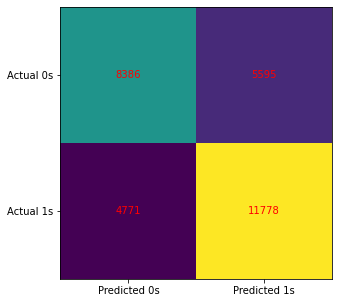

In [555]:
cm = confusion_matrix(y_test,y_test_prediction)   ## visiualization confusion matrix

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [342]:
#True Positives: The cases in which we predicted YES and the actual output was also YES.
#True Negatives: The cases in which we predicted NO and the actual output was NO.
#False Positives: The cases in which we predicted YES and the actual output was NO.
#False Negatives: The cases in which we predicted NO and the actual output was YES.
#Accuracy for the matrix can be calculated by taking average of the values lying across the “main diagonal”

## xgboost

In [556]:
from xgboost import XGBClassifier

xgb2 = XGBClassifier(learning_rate = 0.01, gamma = 2)

xgb2.fit(X_train, y_train)

from sklearn.metrics import roc_auc_score, classification_report

y_pred = xgb2.predict(X_test)

print('Accuracy score :', accuracy_score(y_test, y_pred))
print('Confusion matrix Test :',confusion_matrix(y_test,y_pred))

print(classification_report(y_test, y_pred))

[20:26:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy score : 0.6558794628234523
Confusion matrix Test : [[ 7882  6099]
 [ 4407 12142]]
              precision    recall  f1-score   support

           0       0.64      0.56      0.60     13981
           1       0.67      0.73      0.70     16549

    accuracy                           0.66     30530
   macro avg       0.65      0.65      0.65     30530
weighted avg       0.65      0.66      0.65     30530



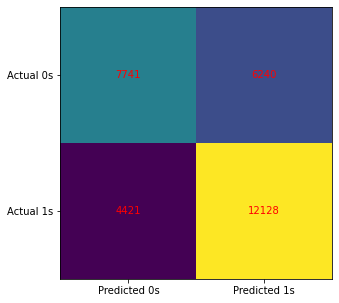

In [259]:
cm = confusion_matrix(y_test, y_pred)   ## visiualization confusion matrix

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [ ]:
#True Positives: The cases in which we predicted YES and the actual output was also YES.
#True Negatives: The cases in which we predicted NO and the actual output was NO.
#False Positives: The cases in which we predicted YES and the actual output was NO.
#False Negatives: The cases in which we predicted NO and the actual output was YES.
#Accuracy for the matrix can be calculated by taking average of the values lying across the “main diagonal”

## catboost

In [238]:
from catboost import CatBoostClassifier
cat2 = CatBoostClassifier()
cat2.fit(X_train,y_train)
cat2.predict(X_test)

Learning rate set to 0.063685
0:	learn: 0.6857323	total: 45.3ms	remaining: 45.3s
1:	learn: 0.6798134	total: 61.9ms	remaining: 30.9s
2:	learn: 0.6740069	total: 77.7ms	remaining: 25.8s
3:	learn: 0.6688115	total: 94.1ms	remaining: 23.4s
4:	learn: 0.6643851	total: 111ms	remaining: 22s
5:	learn: 0.6609974	total: 127ms	remaining: 21s
6:	learn: 0.6574506	total: 143ms	remaining: 20.3s
7:	learn: 0.6548352	total: 157ms	remaining: 19.5s
8:	learn: 0.6518068	total: 175ms	remaining: 19.3s
9:	learn: 0.6494405	total: 196ms	remaining: 19.4s
10:	learn: 0.6471591	total: 217ms	remaining: 19.5s
11:	learn: 0.6451849	total: 235ms	remaining: 19.4s
12:	learn: 0.6433830	total: 254ms	remaining: 19.3s
13:	learn: 0.6420533	total: 271ms	remaining: 19.1s
14:	learn: 0.6405477	total: 286ms	remaining: 18.8s
15:	learn: 0.6390184	total: 302ms	remaining: 18.6s
16:	learn: 0.6376407	total: 317ms	remaining: 18.3s
17:	learn: 0.6363674	total: 333ms	remaining: 18.2s
18:	learn: 0.6353691	total: 348ms	remaining: 17.9s
19:	learn: 

169:	learn: 0.6011183	total: 3.83s	remaining: 18.7s
170:	learn: 0.6010682	total: 3.85s	remaining: 18.7s
171:	learn: 0.6009655	total: 3.87s	remaining: 18.6s
172:	learn: 0.6008859	total: 3.89s	remaining: 18.6s
173:	learn: 0.6008013	total: 3.91s	remaining: 18.6s
174:	learn: 0.6006675	total: 3.93s	remaining: 18.5s
175:	learn: 0.6005405	total: 3.94s	remaining: 18.5s
176:	learn: 0.6004757	total: 3.96s	remaining: 18.4s
177:	learn: 0.6003278	total: 3.98s	remaining: 18.4s
178:	learn: 0.6002117	total: 3.99s	remaining: 18.3s
179:	learn: 0.6001315	total: 4.01s	remaining: 18.3s
180:	learn: 0.6000479	total: 4.02s	remaining: 18.2s
181:	learn: 0.5999504	total: 4.04s	remaining: 18.2s
182:	learn: 0.5998790	total: 4.06s	remaining: 18.1s
183:	learn: 0.5997939	total: 4.08s	remaining: 18.1s
184:	learn: 0.5996445	total: 4.09s	remaining: 18s
185:	learn: 0.5995951	total: 4.12s	remaining: 18s
186:	learn: 0.5994804	total: 4.13s	remaining: 18s
187:	learn: 0.5993064	total: 4.15s	remaining: 17.9s
188:	learn: 0.5992

328:	learn: 0.5863894	total: 7.25s	remaining: 14.8s
329:	learn: 0.5863102	total: 7.28s	remaining: 14.8s
330:	learn: 0.5862949	total: 7.3s	remaining: 14.8s
331:	learn: 0.5862501	total: 7.33s	remaining: 14.8s
332:	learn: 0.5861763	total: 7.36s	remaining: 14.7s
333:	learn: 0.5861659	total: 7.38s	remaining: 14.7s
334:	learn: 0.5860944	total: 7.4s	remaining: 14.7s
335:	learn: 0.5860343	total: 7.43s	remaining: 14.7s
336:	learn: 0.5859599	total: 7.46s	remaining: 14.7s
337:	learn: 0.5858943	total: 7.48s	remaining: 14.7s
338:	learn: 0.5858208	total: 7.51s	remaining: 14.6s
339:	learn: 0.5857416	total: 7.54s	remaining: 14.6s
340:	learn: 0.5857261	total: 7.57s	remaining: 14.6s
341:	learn: 0.5856575	total: 7.59s	remaining: 14.6s
342:	learn: 0.5856012	total: 7.61s	remaining: 14.6s
343:	learn: 0.5855428	total: 7.63s	remaining: 14.5s
344:	learn: 0.5853985	total: 7.64s	remaining: 14.5s
345:	learn: 0.5853544	total: 7.66s	remaining: 14.5s
346:	learn: 0.5852554	total: 7.68s	remaining: 14.4s
347:	learn: 0.

489:	learn: 0.5766624	total: 10.7s	remaining: 11.1s
490:	learn: 0.5766595	total: 10.7s	remaining: 11.1s
491:	learn: 0.5765835	total: 10.7s	remaining: 11.1s
492:	learn: 0.5765161	total: 10.8s	remaining: 11.1s
493:	learn: 0.5764512	total: 10.8s	remaining: 11s
494:	learn: 0.5763581	total: 10.8s	remaining: 11s
495:	learn: 0.5762964	total: 10.8s	remaining: 11s
496:	learn: 0.5762250	total: 10.8s	remaining: 10.9s
497:	learn: 0.5761668	total: 10.8s	remaining: 10.9s
498:	learn: 0.5761603	total: 10.9s	remaining: 10.9s
499:	learn: 0.5760845	total: 10.9s	remaining: 10.9s
500:	learn: 0.5759936	total: 10.9s	remaining: 10.8s
501:	learn: 0.5759361	total: 10.9s	remaining: 10.8s
502:	learn: 0.5758638	total: 11s	remaining: 10.8s
503:	learn: 0.5758031	total: 11s	remaining: 10.8s
504:	learn: 0.5757389	total: 11s	remaining: 10.8s
505:	learn: 0.5756900	total: 11s	remaining: 10.8s
506:	learn: 0.5756316	total: 11s	remaining: 10.7s
507:	learn: 0.5755786	total: 11.1s	remaining: 10.7s
508:	learn: 0.5755294	total:

651:	learn: 0.5681232	total: 14.1s	remaining: 7.5s
652:	learn: 0.5680685	total: 14.1s	remaining: 7.48s
653:	learn: 0.5680053	total: 14.1s	remaining: 7.46s
654:	learn: 0.5679301	total: 14.1s	remaining: 7.44s
655:	learn: 0.5678373	total: 14.2s	remaining: 7.42s
656:	learn: 0.5677984	total: 14.2s	remaining: 7.4s
657:	learn: 0.5677788	total: 14.2s	remaining: 7.38s
658:	learn: 0.5677163	total: 14.2s	remaining: 7.36s
659:	learn: 0.5676619	total: 14.3s	remaining: 7.34s
660:	learn: 0.5676283	total: 14.3s	remaining: 7.32s
661:	learn: 0.5675525	total: 14.3s	remaining: 7.3s
662:	learn: 0.5675119	total: 14.3s	remaining: 7.28s
663:	learn: 0.5674615	total: 14.4s	remaining: 7.26s
664:	learn: 0.5673849	total: 14.4s	remaining: 7.25s
665:	learn: 0.5673750	total: 14.4s	remaining: 7.23s
666:	learn: 0.5673126	total: 14.4s	remaining: 7.21s
667:	learn: 0.5672749	total: 14.5s	remaining: 7.18s
668:	learn: 0.5672312	total: 14.5s	remaining: 7.17s
669:	learn: 0.5671799	total: 14.5s	remaining: 7.15s
670:	learn: 0.5

812:	learn: 0.5606337	total: 17.5s	remaining: 4.02s
813:	learn: 0.5606054	total: 17.5s	remaining: 4s
814:	learn: 0.5605595	total: 17.5s	remaining: 3.98s
815:	learn: 0.5604988	total: 17.6s	remaining: 3.96s
816:	learn: 0.5604646	total: 17.6s	remaining: 3.94s
817:	learn: 0.5604329	total: 17.6s	remaining: 3.92s
818:	learn: 0.5603948	total: 17.6s	remaining: 3.9s
819:	learn: 0.5603705	total: 17.7s	remaining: 3.88s
820:	learn: 0.5603220	total: 17.7s	remaining: 3.86s
821:	learn: 0.5602903	total: 17.7s	remaining: 3.84s
822:	learn: 0.5602383	total: 17.7s	remaining: 3.82s
823:	learn: 0.5601744	total: 17.8s	remaining: 3.79s
824:	learn: 0.5601076	total: 17.8s	remaining: 3.77s
825:	learn: 0.5600780	total: 17.8s	remaining: 3.75s
826:	learn: 0.5600383	total: 17.8s	remaining: 3.73s
827:	learn: 0.5599765	total: 17.8s	remaining: 3.71s
828:	learn: 0.5599102	total: 17.9s	remaining: 3.68s
829:	learn: 0.5598713	total: 17.9s	remaining: 3.66s
830:	learn: 0.5598414	total: 17.9s	remaining: 3.64s
831:	learn: 0.55

979:	learn: 0.5532880	total: 21.1s	remaining: 431ms
980:	learn: 0.5532626	total: 21.1s	remaining: 409ms
981:	learn: 0.5532134	total: 21.2s	remaining: 388ms
982:	learn: 0.5531896	total: 21.2s	remaining: 366ms
983:	learn: 0.5531715	total: 21.2s	remaining: 345ms
984:	learn: 0.5530967	total: 21.2s	remaining: 323ms
985:	learn: 0.5530520	total: 21.2s	remaining: 302ms
986:	learn: 0.5529996	total: 21.3s	remaining: 280ms
987:	learn: 0.5529667	total: 21.3s	remaining: 258ms
988:	learn: 0.5529307	total: 21.3s	remaining: 237ms
989:	learn: 0.5529040	total: 21.3s	remaining: 215ms
990:	learn: 0.5528747	total: 21.3s	remaining: 194ms
991:	learn: 0.5528312	total: 21.3s	remaining: 172ms
992:	learn: 0.5527969	total: 21.4s	remaining: 151ms
993:	learn: 0.5527541	total: 21.4s	remaining: 129ms
994:	learn: 0.5527197	total: 21.4s	remaining: 108ms
995:	learn: 0.5526729	total: 21.4s	remaining: 86.1ms
996:	learn: 0.5526333	total: 21.5s	remaining: 64.6ms
997:	learn: 0.5525716	total: 21.5s	remaining: 43.1ms
998:	lear

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [239]:
print(classification_report(y_test,cat2.predict(X_test)))

              precision    recall  f1-score   support

           0       0.65      0.61      0.63     13981
           1       0.69      0.72      0.70     16549

    accuracy                           0.67     30530
   macro avg       0.67      0.66      0.66     30530
weighted avg       0.67      0.67      0.67     30530



## removing class 1 >30

In [241]:
data2 = final[final['readmitted']!=1]

In [242]:
data2.shape

(66221, 49)

In [243]:
data2['readmitted'] = data2['readmitted'].map({2:0,0:1})
data2['readmitted'].value_counts()

0    54864
1    11357
Name: readmitted, dtype: int64

In [ ]:
#0 represents No readmission
#1 represents readmission

## Gradientboosting

In [263]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.metrics import classification_report

x = data2.drop('readmitted',axis=1)
y = data2.readmitted

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3)

gb = GradientBoostingClassifier()
gb.fit(xtrain,ytrain)

print(classification_report(ytrain,gb.predict(xtrain)))
print(classification_report(ytest,gb.predict(xtest)))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94     38456
           1       0.77      0.63      0.69      7898

    accuracy                           0.91     46354
   macro avg       0.85      0.80      0.82     46354
weighted avg       0.90      0.91      0.90     46354

              precision    recall  f1-score   support

           0       0.93      0.96      0.94     16408
           1       0.78      0.63      0.70      3459

    accuracy                           0.90     19867
   macro avg       0.85      0.80      0.82     19867
weighted avg       0.90      0.90      0.90     19867



## xgboost

In [269]:
from xgboost import XGBClassifier

xgb = XGBClassifier(learning_rate = 0.01, gamma = 2)

xgb.fit(xtrain, ytrain)

from sklearn.metrics import roc_auc_score, classification_report

y_pred = xgb.predict(xtest)

print('Accuracy score :', accuracy_score(ytest, y_pred))
print('Confusion matrix Test :',confusion_matrix(ytest,y_pred))


print(classification_report(ytest, y_pred))

[16:36:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy score : 0.9006895857452056
Confusion matrix Test : [[15685   723]
 [ 1250  2209]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.94     16408
           1       0.75      0.64      0.69      3459

    accuracy                           0.90     19867
   macro avg       0.84      0.80      0.82     19867
weighted avg       0.90      0.90      0.90     19867



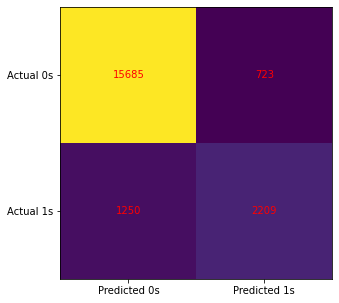

In [270]:
cm = confusion_matrix(ytest,y_pred)   ## visiualization confusion matrix

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

## catboost

In [280]:
x.shape

(66221, 48)

In [251]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier()
cat.fit(xtrain,ytrain)



Learning rate set to 0.053009
0:	learn: 0.6388591	total: 16.6ms	remaining: 16.6s
1:	learn: 0.5913174	total: 35.3ms	remaining: 17.6s
2:	learn: 0.5510918	total: 50.9ms	remaining: 16.9s
3:	learn: 0.5148440	total: 63.8ms	remaining: 15.9s
4:	learn: 0.4919891	total: 76.7ms	remaining: 15.3s
5:	learn: 0.4639676	total: 89.2ms	remaining: 14.8s
6:	learn: 0.4399201	total: 102ms	remaining: 14.5s
7:	learn: 0.4190094	total: 114ms	remaining: 14.2s
8:	learn: 0.4053863	total: 126ms	remaining: 13.9s
9:	learn: 0.3882382	total: 138ms	remaining: 13.7s
10:	learn: 0.3787041	total: 150ms	remaining: 13.5s
11:	learn: 0.3657590	total: 162ms	remaining: 13.3s
12:	learn: 0.3553531	total: 173ms	remaining: 13.1s
13:	learn: 0.3463889	total: 185ms	remaining: 13s
14:	learn: 0.3406424	total: 197ms	remaining: 12.9s
15:	learn: 0.3332130	total: 212ms	remaining: 13s
16:	learn: 0.3277397	total: 226ms	remaining: 13.1s
17:	learn: 0.3211853	total: 243ms	remaining: 13.3s
18:	learn: 0.3182173	total: 256ms	remaining: 13.2s
19:	learn

168:	learn: 0.2371182	total: 2.4s	remaining: 11.8s
169:	learn: 0.2371031	total: 2.42s	remaining: 11.8s
170:	learn: 0.2370885	total: 2.44s	remaining: 11.8s
171:	learn: 0.2370425	total: 2.46s	remaining: 11.8s
172:	learn: 0.2369421	total: 2.48s	remaining: 11.8s
173:	learn: 0.2368946	total: 2.49s	remaining: 11.8s
174:	learn: 0.2368222	total: 2.51s	remaining: 11.8s
175:	learn: 0.2367197	total: 2.53s	remaining: 11.8s
176:	learn: 0.2366938	total: 2.55s	remaining: 11.8s
177:	learn: 0.2365806	total: 2.57s	remaining: 11.9s
178:	learn: 0.2364576	total: 2.59s	remaining: 11.9s
179:	learn: 0.2363537	total: 2.61s	remaining: 11.9s
180:	learn: 0.2362361	total: 2.63s	remaining: 11.9s
181:	learn: 0.2360722	total: 2.65s	remaining: 11.9s
182:	learn: 0.2359626	total: 2.67s	remaining: 11.9s
183:	learn: 0.2359317	total: 2.69s	remaining: 11.9s
184:	learn: 0.2358067	total: 2.71s	remaining: 11.9s
185:	learn: 0.2355916	total: 2.72s	remaining: 11.9s
186:	learn: 0.2354996	total: 2.74s	remaining: 11.9s
187:	learn: 0

330:	learn: 0.2229973	total: 4.63s	remaining: 9.36s
331:	learn: 0.2229112	total: 4.64s	remaining: 9.34s
332:	learn: 0.2228472	total: 4.66s	remaining: 9.32s
333:	learn: 0.2227696	total: 4.67s	remaining: 9.31s
334:	learn: 0.2227153	total: 4.68s	remaining: 9.29s
335:	learn: 0.2226565	total: 4.69s	remaining: 9.27s
336:	learn: 0.2225694	total: 4.7s	remaining: 9.25s
337:	learn: 0.2224911	total: 4.71s	remaining: 9.23s
338:	learn: 0.2224869	total: 4.73s	remaining: 9.21s
339:	learn: 0.2224448	total: 4.74s	remaining: 9.2s
340:	learn: 0.2223836	total: 4.75s	remaining: 9.18s
341:	learn: 0.2223250	total: 4.76s	remaining: 9.16s
342:	learn: 0.2222894	total: 4.77s	remaining: 9.14s
343:	learn: 0.2222176	total: 4.79s	remaining: 9.13s
344:	learn: 0.2222132	total: 4.8s	remaining: 9.11s
345:	learn: 0.2221336	total: 4.81s	remaining: 9.09s
346:	learn: 0.2220803	total: 4.82s	remaining: 9.07s
347:	learn: 0.2220270	total: 4.83s	remaining: 9.06s
348:	learn: 0.2219636	total: 4.85s	remaining: 9.04s
349:	learn: 0.2

495:	learn: 0.2133464	total: 6.66s	remaining: 6.77s
496:	learn: 0.2133432	total: 6.68s	remaining: 6.76s
497:	learn: 0.2132645	total: 6.69s	remaining: 6.74s
498:	learn: 0.2132372	total: 6.7s	remaining: 6.73s
499:	learn: 0.2131978	total: 6.71s	remaining: 6.71s
500:	learn: 0.2131533	total: 6.72s	remaining: 6.7s
501:	learn: 0.2131090	total: 6.73s	remaining: 6.68s
502:	learn: 0.2130095	total: 6.75s	remaining: 6.67s
503:	learn: 0.2129428	total: 6.76s	remaining: 6.65s
504:	learn: 0.2129067	total: 6.77s	remaining: 6.64s
505:	learn: 0.2128288	total: 6.78s	remaining: 6.62s
506:	learn: 0.2127586	total: 6.8s	remaining: 6.61s
507:	learn: 0.2126940	total: 6.81s	remaining: 6.59s
508:	learn: 0.2126294	total: 6.82s	remaining: 6.58s
509:	learn: 0.2125315	total: 6.83s	remaining: 6.57s
510:	learn: 0.2124584	total: 6.85s	remaining: 6.55s
511:	learn: 0.2123748	total: 6.86s	remaining: 6.54s
512:	learn: 0.2123173	total: 6.88s	remaining: 6.53s
513:	learn: 0.2122792	total: 6.89s	remaining: 6.51s
514:	learn: 0.2

660:	learn: 0.2052766	total: 9.13s	remaining: 4.68s
661:	learn: 0.2052268	total: 9.14s	remaining: 4.67s
662:	learn: 0.2051780	total: 9.16s	remaining: 4.66s
663:	learn: 0.2051054	total: 9.18s	remaining: 4.64s
664:	learn: 0.2050623	total: 9.19s	remaining: 4.63s
665:	learn: 0.2050095	total: 9.2s	remaining: 4.61s
666:	learn: 0.2049152	total: 9.22s	remaining: 4.6s
667:	learn: 0.2048852	total: 9.23s	remaining: 4.59s
668:	learn: 0.2048272	total: 9.24s	remaining: 4.57s
669:	learn: 0.2047499	total: 9.26s	remaining: 4.56s
670:	learn: 0.2047111	total: 9.27s	remaining: 4.54s
671:	learn: 0.2046634	total: 9.28s	remaining: 4.53s
672:	learn: 0.2046319	total: 9.3s	remaining: 4.52s
673:	learn: 0.2046093	total: 9.31s	remaining: 4.5s
674:	learn: 0.2045636	total: 9.32s	remaining: 4.49s
675:	learn: 0.2045067	total: 9.34s	remaining: 4.48s
676:	learn: 0.2044729	total: 9.35s	remaining: 4.46s
677:	learn: 0.2044244	total: 9.37s	remaining: 4.45s
678:	learn: 0.2043707	total: 9.38s	remaining: 4.43s
679:	learn: 0.20

825:	learn: 0.1980278	total: 11.4s	remaining: 2.39s
826:	learn: 0.1979925	total: 11.4s	remaining: 2.38s
827:	learn: 0.1979492	total: 11.4s	remaining: 2.37s
828:	learn: 0.1979484	total: 11.4s	remaining: 2.35s
829:	learn: 0.1978790	total: 11.4s	remaining: 2.34s
830:	learn: 0.1978505	total: 11.4s	remaining: 2.33s
831:	learn: 0.1978085	total: 11.4s	remaining: 2.31s
832:	learn: 0.1977447	total: 11.5s	remaining: 2.3s
833:	learn: 0.1977072	total: 11.5s	remaining: 2.28s
834:	learn: 0.1976692	total: 11.5s	remaining: 2.27s
835:	learn: 0.1976392	total: 11.5s	remaining: 2.25s
836:	learn: 0.1975978	total: 11.5s	remaining: 2.24s
837:	learn: 0.1975587	total: 11.5s	remaining: 2.23s
838:	learn: 0.1975160	total: 11.5s	remaining: 2.21s
839:	learn: 0.1974783	total: 11.5s	remaining: 2.2s
840:	learn: 0.1974034	total: 11.6s	remaining: 2.19s
841:	learn: 0.1973616	total: 11.6s	remaining: 2.17s
842:	learn: 0.1973301	total: 11.6s	remaining: 2.16s
843:	learn: 0.1973079	total: 11.6s	remaining: 2.14s
844:	learn: 0.

987:	learn: 0.1917171	total: 13.4s	remaining: 162ms
988:	learn: 0.1916801	total: 13.4s	remaining: 149ms
989:	learn: 0.1916364	total: 13.4s	remaining: 135ms
990:	learn: 0.1916072	total: 13.4s	remaining: 122ms
991:	learn: 0.1915599	total: 13.4s	remaining: 108ms
992:	learn: 0.1915210	total: 13.4s	remaining: 94.7ms
993:	learn: 0.1914746	total: 13.4s	remaining: 81.2ms
994:	learn: 0.1914147	total: 13.5s	remaining: 67.6ms
995:	learn: 0.1913455	total: 13.5s	remaining: 54.1ms
996:	learn: 0.1913177	total: 13.5s	remaining: 40.6ms
997:	learn: 0.1912758	total: 13.5s	remaining: 27ms
998:	learn: 0.1912056	total: 13.5s	remaining: 13.5ms
999:	learn: 0.1911439	total: 13.5s	remaining: 0us


In [253]:

print(classification_report(ytest,cat.predict(xtest)))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95     16498
           1       0.79      0.64      0.71      3369

    accuracy                           0.91     19867
   macro avg       0.86      0.80      0.83     19867
weighted avg       0.91      0.91      0.91     19867



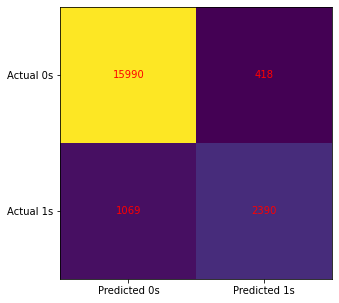

In [271]:
cm = confusion_matrix(ytest,cat.predict(xtest))   ## visiualization confusion matrix

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

## Randomforest

In [254]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.metrics import classification_report

x = data2.drop('readmitted',axis=1)
y = data2.readmitted

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3)

rf = RandomForestClassifier()
rf.fit(xtrain,ytrain)

print(classification_report(ytest,rf.predict(xtest)))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     16484
           1       0.78      0.58      0.66      3383

    accuracy                           0.90     19867
   macro avg       0.85      0.77      0.80     19867
weighted avg       0.89      0.90      0.89     19867



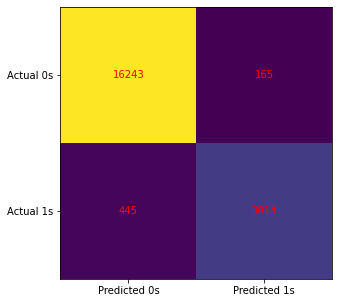

In [272]:
cm = confusion_matrix(ytest,rf.predict(xtest))   ## visiualization confusion matrix

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [315]:
plt.figure(figsize=(15,5))
k=pd.Series(rf.feature_importances_,index=xtrain.columns).sort_values(ascending=False)
k[k>0.00002].index

Index(['no of times', 'encounter_id', 'patient_nbr', 'number_inpatient',
       'num_lab_procedures', 'Service Utilization', 'num_medications',
       'time_in_hospital', 'age', 'number_diagnoses', 'num_procedures',
       'payer_code', 'medical_specialty', 'discharge_disposition_id',
       'med_spec', 'insulin', 'admission_source_id', 'number_emergency',
       'race', 'gender', 'A1Cresult', 'number_outpatient', 'admission_type_id',
       'metformin', 'glipizide', 'change', 'glyburide', 'diabetesMed',
       'pioglitazone', 'max_glu_serum', 'rosiglitazone', 'glimepiride',
       'repaglinide', 'glyburide-metformin', 'nateglinide', 'acarbose',
       'chlorpropamide', 'miglitol', 'tolazamide', 'glipizide-metformin'],
      dtype='object')

<Figure size 1080x360 with 0 Axes>

In [319]:
F_IMP = pd.DataFrame({'Features':xtrain.columns,'F_Important':rf.feature_importances_})
F_IMP.sort_values('F_Important',ascending=False)
Top10_features=F_IMP.copy()

In [285]:
import matplotlib.pyplot as plt

#For random forest :
# get importance
importance = rf.feature_importances_.sort_values()
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'sort_values'

In [336]:
Top10_features.head(10)

,Features,F_Important
0,encounter_id,0.076851
1,patient_nbr,0.069551
2,race,0.012943
3,gender,0.011667
4,age,0.029855
5,admission_type_id,0.009864
6,discharge_disposition_id,0.019838
7,admission_source_id,0.015585
8,time_in_hospital,0.035834
9,payer_code,0.023297


In [340]:
final2.shape

(101766, 48)

In [338]:
xtest.shape

(19867, 48)

In [322]:
Top10_features.sort_values('Top10_features',ascending=False).plot(kind='bar')

KeyError: 'Top10_features'